<div style="display: flex; justify-content: space-between; align-items: center; width: 100%;">
    <!-- Left logo -->
    <div>
        <img src="UK-train.png" alt="Left Logo" width="110" style="border-radius: 50%;">
    </div>
    <!-- Title -->
    <div style="flex-grow: 1; display: flex; justify-content: center; align-items: center; width: 120%;">
        <div style="color: #5DADE2; padding: 10px;">
            <h1 style="margin: 0;">UK Train Riders Data Analysis</h1>
        </div>
    </div>
    <!-- Right logos -->
    <div style="display: flex; justify-content: flex-end; gap: 20px; padding-right: 30px;">
        <img src="logo.png" alt="Right Logo 1" width="100" style="background-color: #fff; padding: 5px;">
        <img src="proAr.png" alt="Right Logo 2" width="100" style="background-color: #fff; padding: 5px;">
    </div>
</div>


## <p style="color: #76D7C4;">I. Introduction</p>

The UK rail network is a critical component of the country's transportation infrastructure, serving millions of passengers annually. As ridership continues to grow, understanding passenger behavior, preferences, and pain points becomes essential for improving service delivery, optimizing revenue, and enhancing customer satisfaction. This data analysis delves into various aspects of UK train ridership, leveraging key metrics such as ticket types, purchase methods, journey statuses, and delay reasons to uncover actionable insights.

Through this analysis, we aim to address several important questions: What types of tickets generate the most revenue? How do different payment methods and purchase channels influence transaction patterns? What factors contribute to delays or cancellations, and how do these impact refund requests and overall customer experience? Additionally, we explore the distribution of railcard usage, journey statuses, and departure stations to identify trends and opportunities for improvement.

By examining these dimensions, this analysis provides a comprehensive overview of the current state of the UK train system, highlighting areas of strength and potential challenges. The findings will help stakeholders make informed decisions to enhance operational efficiency, improve customer satisfaction, and ultimately drive sustainable growth in the UK rail sector.

## <p style="color: #76D7C4;">II. Project Proposal</p>

#### Overview

This project aims to analyze UK railway travel data to uncover insights into ticket sales, travel patterns, delays, and pricing. The goal is to provide actionable insights to improve train travel efficiency through data-driven dashboards and visualizations.

#### Objectives

<p style="line-height: 1.5;">
<mark style="background-color:#F9E79F; color:#000000;">•Identify trends in ticket sales and most traveled routes.</mark><br>
<mark style="background-color:#F9E79F; color:#000000;">•Analyze reasons for train delays and their impact on passengers.</mark><br>
<mark style="background-color:#F9E79F; color:#000000;">•Provide a structured pricing analysis based on ticket type and class.</mark><br>
<mark style="background-color:#F9E79F; color:#000000;">•Develop an interactive dashboard for stakeholders to explore insights.</mark>
</p>

#### Scope

<p style="line-height: 1.5;">
<mark style="background-color:#F9E79F; color:#000000;">•Data collection and preprocessing of railway transaction data.</mark><br>
<mark style="background-color:#F9E79F; color:#000000;">•Exploratory data analysis (EDA) to identify key patterns.</mark><br>
<mark style="background-color:#F9E79F; color:#000000;">•Data modeling to structure the dataset for further insights.</mark><br>
<mark style="background-color:#F9E79F; color:#000000;">•Visualizations to highlight trends in travel, pricing, and delays.</mark><br>
<mark style="background-color:#F9E79F; color:#000000;">•Dashboard development for easy exploration of insights.</mark>
</p>

## <p style="color: #76D7C4;">III. Import Libraries & Dataset</p>

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df=pd.read_csv('../../Excel/Datasets/railway.csv')

In [3]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,12/8/2023,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,1/1/2024,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,12/16/2023,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,1/1/2024,9:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,12/19/2023,19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,1/2/2024,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,12/20/2023,23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,1/1/2024,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,12/27/2023,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,1/1/2024,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [4]:
df=pd.DataFrame(df)

## <p style="color: #76D7C4;">IV. Data Preprocessing</p>

In [5]:
print(df.head())

            Transaction ID Date of Purchase Time of Purchase Purchase Type  \
0  da8a6ba8-b3dc-4677-b176        12/8/2023         12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       12/16/2023         11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       12/19/2023         19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       12/20/2023         23:00:36       Station   
4  2be00b45-0762-485e-a7a3       12/27/2023         18:22:56        Online   

  Payment Method Railcard Ticket Class Ticket Type  Price  \
0    Contactless    Adult     Standard     Advance     43   
1    Credit Card    Adult     Standard     Advance     23   
2    Credit Card     None     Standard     Advance      3   
3    Credit Card     None     Standard     Advance     13   
4    Contactless     None     Standard     Advance     76   

       Departure Station    Arrival Destination Date of Journey  \
0      London Paddington  Liverpool Lime Street        1/1/2024   
1     London Kings Cross      

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             31653 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [7]:
print(df.describe())

              Price
count  31653.000000
mean      23.439200
std       29.997628
min        1.000000
25%        5.000000
50%       11.000000
75%       35.000000
max      267.000000


In [8]:
print(df.shape)

(31653, 18)


In [9]:
print(df.dtypes)

Transaction ID         object
Date of Purchase       object
Time of Purchase       object
Purchase Type          object
Payment Method         object
Railcard               object
Ticket Class           object
Ticket Type            object
Price                   int64
Departure Station      object
Arrival Destination    object
Date of Journey        object
Departure Time         object
Arrival Time           object
Actual Arrival Time    object
Journey Status         object
Reason for Delay       object
Refund Request         object
dtype: object


In [10]:
print(df.columns)

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request'],
      dtype='object')


In [11]:
print(df.isnull().sum())

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard                   0
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64


In [12]:
print(df.duplicated().sum())

0


In [13]:
print(df['Price'].value_counts())

3      3468
8      2364
13     2139
35     2129
7      2075
       ... 
180       1
74        1
109       1
94        1
102       1
Name: Price, Length: 125, dtype: int64


In [14]:
print(df['Ticket Type'].value_counts())

Advance     17561
Off-Peak     8752
Anytime      5340
Name: Ticket Type, dtype: int64


In [15]:
print(df['Ticket Class'].value_counts())

Standard       28595
First Class     3058
Name: Ticket Class, dtype: int64


In [16]:
print(df['Railcard'].value_counts())

None        20918
Adult        4846
Disabled     3089
Senior       2800
Name: Railcard, dtype: int64


In [17]:
print(df['Payment Method'].value_counts())

Credit Card    19136
Contactless    10834
Debit Card      1683
Name: Payment Method, dtype: int64


In [18]:
print(df['Purchase Type'].value_counts())

Online     18521
Station    13132
Name: Purchase Type, dtype: int64


In [19]:
print(df['Time of Purchase'].value_counts())

8:16:53     6
8:21:17     6
17:25:24    6
8:00:58     6
9:31:25     6
           ..
8:14:20     1
8:08:48     1
8:07:57     1
8:05:09     1
20:05:39    1
Name: Time of Purchase, Length: 24351, dtype: int64


In [20]:
print(df['Date of Purchase'].value_counts())

2/2/2024      513
2/3/2024      493
1/31/2024     425
2/4/2024      421
2/7/2024      415
             ... 
12/30/2023      1
12/27/2023      1
12/20/2023      1
12/19/2023      1
12/8/2023       1
Name: Date of Purchase, Length: 128, dtype: int64


In [21]:
print(df['Transaction ID'].value_counts())

da8a6ba8-b3dc-4677-b176    1
57270295-4c04-41ef-8d60    1
e69c5905-c982-4362-8413    1
79d56b17-19ee-4f2d-a279    1
7dbec16c-8f83-442c-a7a2    1
                          ..
0bbcdb6e-1da7-4e88-9ddd    1
625339b0-33be-45b7-acf8    1
2829b4fd-802d-480f-8346    1
b8d53a45-b49b-453b-81b4    1
1d5d89a2-bde5-410f-8f91    1
Name: Transaction ID, Length: 31653, dtype: int64


In [22]:
print(df['Departure Station'].value_counts())

Manchester Piccadilly    5650
London Euston            4954
Liverpool Lime Street    4561
London Paddington        4500
London Kings Cross       4229
London St Pancras        3891
Birmingham New Street    2136
York                      927
Reading                   594
Oxford                    144
Edinburgh Waverley         51
Bristol Temple Meads       16
Name: Departure Station, dtype: int64


In [23]:
print(df['Arrival Destination'].value_counts())

Birmingham New Street    7742
Liverpool Lime Street    5022
York                     4019
Manchester Piccadilly    3968
Reading                  3920
London Euston            1567
London St Pancras         749
Oxford                    623
London Paddington         351
Leicester                 337
Sheffield                 272
Durham                    258
Leeds                     255
Peterborough              242
Swindon                   228
Tamworth                  227
Nuneaton                  219
Doncaster                 211
Crewe                     193
Stafford                  190
Edinburgh Waverley        178
Nottingham                158
Edinburgh                 154
Bristol Temple Meads      144
Wolverhampton             115
London Kings Cross         84
London Waterloo            68
Coventry                   65
Didcot                     48
Cardiff Central            16
Wakefield                  15
Warrington                 15
Name: Arrival Destination, dtype: int64


In [24]:
print(df['Date of Journey'].value_counts())

3/9/2024     313
3/25/2024    304
4/19/2024    304
4/9/2024     302
1/18/2024    301
            ... 
4/2/2024     153
1/2/2024     146
3/1/2024      73
1/1/2024      66
4/1/2024      63
Name: Date of Journey, Length: 121, dtype: int64


In [25]:
print(df['Departure Time'].value_counts())

18:45:00    2598
17:45:00    1703
6:30:00     1437
8:00:00     1390
16:00:00    1332
            ... 
16:45:00      33
1:15:00       32
22:45:00      32
0:45:00       32
23:00:00      30
Name: Departure Time, Length: 96, dtype: int64


In [26]:
print(df['Arrival Time'].value_counts())

19:05:00    1069
10:15:00     872
7:50:00      856
20:05:00     846
17:20:00     813
            ... 
2:15:00       16
4:50:00       16
20:55:00      14
6:40:00       14
2:05:00       13
Name: Arrival Time, Length: 203, dtype: int64


In [27]:
print(df['Actual Arrival Time'].value_counts())

19:05:00    1013
7:50:00      787
20:05:00     707
19:45:00     559
17:20:00     557
            ... 
2:36:00        1
7:58:00        1
5:51:00        1
17:17:00       1
4:06:00        1
Name: Actual Arrival Time, Length: 623, dtype: int64


In [28]:
print(df['Journey Status'].value_counts())

On Time      27481
Delayed       2292
Cancelled     1880
Name: Journey Status, dtype: int64


In [29]:
print(df['Reason for Delay'].value_counts())

Weather               995
Technical Issue       707
Signal Failure        523
Signal failure        447
Staffing              410
Staff Shortage        399
Weather Conditions    377
Traffic               314
Name: Reason for Delay, dtype: int64


In [30]:
print(df['Refund Request'].value_counts())

No     30535
Yes     1118
Name: Refund Request, dtype: int64


In [31]:
df['Reason for Delay'].fillna('No Delay', inplace=True)

In [32]:
print(df['Reason for Delay'].value_counts())


No Delay              27481
Weather                 995
Technical Issue         707
Signal Failure          523
Signal failure          447
Staffing                410
Staff Shortage          399
Weather Conditions      377
Traffic                 314
Name: Reason for Delay, dtype: int64


In [33]:
df['Railcard'].fillna('No Railcard', inplace=True)


In [34]:
print(df['Railcard'].value_counts())



None        20918
Adult        4846
Disabled     3089
Senior       2800
Name: Railcard, dtype: int64


In [35]:
# Convert Date of Purchase to datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

# Extract year and month
df['Year'] = df['Date of Purchase'].dt.year
df['Month'] = df['Date of Purchase'].dt.month

# Create a month name column
df['Month_Name'] = df['Date of Purchase'].dt.month_name()

# Now you can access monthly data using the Month_Name column
print("\nMonthly distribution of purchases:")
print(df['Month_Name'].value_counts().sort_index())

# If you want to see data for a specific month, you can filter like this:
print("\nSample of January purchases:")
print(df[df['Month_Name'] == 'January'].head())


Monthly distribution of purchases:
April       7748
December      34
February    7337
January     8434
March       8100
Name: Month_Name, dtype: int64

Sample of January purchases:
             Transaction ID Date of Purchase Time of Purchase Purchase Type  \
34  a3a42b1b-bf7f-43d9-b63c       2024-01-01          1:10:20       Station   
35  ea7108cf-382b-4794-aa8c       2024-01-01          1:16:20        Online   
36  d8275e2a-8493-4b30-b6e0       2024-01-01          3:02:34       Station   
37  b7cf7da5-b4c2-4e24-897c       2024-01-01          3:03:49        Online   
38  58a7ad60-8670-41a4-87ba       2024-01-01          3:35:48        Online   

   Payment Method Railcard Ticket Class Ticket Type  Price  \
34    Contactless     None     Standard    Off-Peak     10   
35    Contactless     None     Standard    Off-Peak      4   
36    Contactless     None     Standard    Off-Peak     12   
37    Credit Card     None     Standard    Off-Peak     33   
38    Credit Card    Adult     St

In [36]:
print(df.loc[0])

Transaction ID         da8a6ba8-b3dc-4677-b176
Date of Purchase           2023-12-08 00:00:00
Time of Purchase                      12:41:11
Purchase Type                           Online
Payment Method                     Contactless
Railcard                                 Adult
Ticket Class                          Standard
Ticket Type                            Advance
Price                                       43
Departure Station            London Paddington
Arrival Destination      Liverpool Lime Street
Date of Journey                       1/1/2024
Departure Time                        11:00:00
Arrival Time                          13:30:00
Actual Arrival Time                   13:30:00
Journey Status                         On Time
Reason for Delay                      No Delay
Refund Request                              No
Year                                      2023
Month                                       12
Month_Name                            December
Name: 0, dtyp

In [37]:
print(df.loc[1])

Transaction ID         b0cdd1b0-f214-4197-be53
Date of Purchase           2023-12-16 00:00:00
Time of Purchase                      11:23:01
Purchase Type                          Station
Payment Method                     Credit Card
Railcard                                 Adult
Ticket Class                          Standard
Ticket Type                            Advance
Price                                       23
Departure Station           London Kings Cross
Arrival Destination                       York
Date of Journey                       1/1/2024
Departure Time                         9:45:00
Arrival Time                          11:35:00
Actual Arrival Time                   11:40:00
Journey Status                         Delayed
Reason for Delay                Signal Failure
Refund Request                              No
Year                                      2023
Month                                       12
Month_Name                            December
Name: 1, dtyp

In [38]:
print(df.loc[777])

Transaction ID         5851b51d-d0a5-4804-90b3
Date of Purchase           2024-01-04 00:00:00
Time of Purchase                      10:44:37
Purchase Type                          Station
Payment Method                     Contactless
Railcard                                 Adult
Ticket Class                          Standard
Ticket Type                            Advance
Price                                        6
Departure Station        Manchester Piccadilly
Arrival Destination                      Leeds
Date of Journey                       1/5/2024
Departure Time                         9:00:00
Arrival Time                           9:45:00
Actual Arrival Time                   12:37:00
Journey Status                         Delayed
Reason for Delay                Signal Failure
Refund Request                              No
Year                                      2024
Month                                        1
Month_Name                             January
Name: 777, dt

In [39]:
df['Date of Purchase']=pd.to_datetime(df['Date of Purchase'])
df['2023']=df['Date of Purchase'].dt.year
df['2024']=df['Date of Purchase'].dt.year
df['January']=df['Date of Purchase'].dt.month
df['Feburary']=df['Date of Purchase'].dt.month
df['March']=df['Date of Purchase'].dt.month
df['April']=df['Date of Purchase'].dt.month
df['May']=df['Date of Purchase'].dt.month
df['June']=df['Date of Purchase'].dt.month
df['July']=df['Date of Purchase'].dt.month
df['August']=df['Date of Purchase'].dt.month
df['September']=df['Date of Purchase'].dt.month
df['October']=df['Date of Purchase'].dt.month
df['November']=df['Date of Purchase'].dt.month
df['December']=df['Date of Purchase'].dt.month

In [40]:
print(df['2023'])

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
31648    2024
31649    2024
31650    2024
31651    2024
31652    2024
Name: 2023, Length: 31653, dtype: int64


In [41]:
print(df['Price'].mean())

23.439200075822196


In [42]:
print(df['Price'].sum())

741921


In [43]:
print(df['Price'].min())

1


In [44]:
print(df['Price'].max())

267


In [45]:
print(df['Price'].count())

31653


In [46]:
print("\nChecking for null values in each column:")
print(df.isnull().sum())


Checking for null values in each column:
Transaction ID            0
Date of Purchase          0
Time of Purchase          0
Purchase Type             0
Payment Method            0
Railcard                  0
Ticket Class              0
Ticket Type               0
Price                     0
Departure Station         0
Arrival Destination       0
Date of Journey           0
Departure Time            0
Arrival Time              0
Actual Arrival Time    1880
Journey Status            0
Reason for Delay          0
Refund Request            0
Year                      0
Month                     0
Month_Name                0
2023                      0
2024                      0
January                   0
Feburary                  0
March                     0
April                     0
May                       0
June                      0
July                      0
August                    0
September                 0
October                   0
November                  0
Decemb

In [47]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of null values in each column:")
print(null_percentage)


Percentage of null values in each column:
Transaction ID         0.000000
Date of Purchase       0.000000
Time of Purchase       0.000000
Purchase Type          0.000000
Payment Method         0.000000
Railcard               0.000000
Ticket Class           0.000000
Ticket Type            0.000000
Price                  0.000000
Departure Station      0.000000
Arrival Destination    0.000000
Date of Journey        0.000000
Departure Time         0.000000
Arrival Time           0.000000
Actual Arrival Time    5.939405
Journey Status         0.000000
Reason for Delay       0.000000
Refund Request         0.000000
Year                   0.000000
Month                  0.000000
Month_Name             0.000000
2023                   0.000000
2024                   0.000000
January                0.000000
Feburary               0.000000
March                  0.000000
April                  0.000000
May                    0.000000
June                   0.000000
July                   0.0000

In [48]:
df['Reason for Delay'].fillna('No Delay', inplace=True)
df['Railcard'].fillna('No Railcard', inplace=True)

In [49]:
print("\nChecking for null values after handling missing values:")
print(df.isnull().sum())


Checking for null values after handling missing values:
Transaction ID            0
Date of Purchase          0
Time of Purchase          0
Purchase Type             0
Payment Method            0
Railcard                  0
Ticket Class              0
Ticket Type               0
Price                     0
Departure Station         0
Arrival Destination       0
Date of Journey           0
Departure Time            0
Arrival Time              0
Actual Arrival Time    1880
Journey Status            0
Reason for Delay          0
Refund Request            0
Year                      0
Month                     0
Month_Name                0
2023                      0
2024                      0
January                   0
Feburary                  0
March                     0
April                     0
May                       0
June                      0
July                      0
August                    0
September                 0
October                   0
November           

In [50]:
# Fill missing values with the scheduled arrival time
df['Actual Arrival Time'] = df['Actual Arrival Time'].fillna(df['Arrival Time'])

In [51]:
# Verify the results
print("\nAfter filling with scheduled arrival time:")
print("Remaining missing values:", df['Actual Arrival Time'].isnull().sum())


After filling with scheduled arrival time:
Remaining missing values: 0


In [52]:
# Show sample of the results
print("\nSample of the data after filling missing values:")
print(df[['Arrival Time', 'Actual Arrival Time']].head(10))


Sample of the data after filling missing values:
  Arrival Time Actual Arrival Time
0     13:30:00            13:30:00
1     11:35:00            11:40:00
2     18:45:00            18:45:00
3     22:30:00            22:30:00
4     19:00:00            19:00:00
5      8:05:00             8:05:00
6     23:40:00            23:40:00
7      0:30:00             0:30:00
8      1:50:00             2:07:00
9      2:30:00             2:30:00


In [53]:
print("\nChecking for null values after handling missing values:")
print(df.isnull().sum())


Checking for null values after handling missing values:
Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Reason for Delay       0
Refund Request         0
Year                   0
Month                  0
Month_Name             0
2023                   0
2024                   0
January                0
Feburary               0
March                  0
April                  0
May                    0
June                   0
July                   0
August                 0
September              0
October                0
November               0
December               0
dtype: int64


In [54]:
df[['Arrival Time', 'Actual Arrival Time']].head(40)

,Arrival Time,Actual Arrival Time
0,13:30:00,13:30:00
1,11:35:00,11:40:00
2,18:45:00,18:45:00
3,22:30:00,22:30:00
4,19:00:00,19:00:00
5,8:05:00,8:05:00
6,23:40:00,23:40:00
7,0:30:00,0:30:00
8,1:50:00,2:07:00
9,2:30:00,2:30:00


## <p style="color: #76D7C4;">V. Data Modelling</p>

#### Journey Table

In [55]:
dim_journey = pd.DataFrame()
dim_journey['Journey_ID'] = range(1, len(df) + 1)
dim_journey['Journey_Date'] = pd.to_datetime(df['Date of Journey'])
dim_journey['Departure_Time'] = pd.to_datetime(df['Departure Time'], format='%H:%M:%S').dt.time
dim_journey['Arrival_Time'] = pd.to_datetime(df['Arrival Time'], format='%H:%M:%S').dt.time
dim_journey['Actual_Arrival_Time'] = pd.to_datetime(df['Actual Arrival Time'], format='%H:%M:%S').dt.time

In [56]:

from datetime import datetime

dim_journey['Reason_for_Delay'] = df['Reason for Delay'].fillna('No Delay')

def calculate_duration(dep_time, arr_time):
    dep = datetime.strptime(str(dep_time), '%H:%M:%S')
    arr = datetime.strptime(str(arr_time), '%H:%M:%S')
    duration = arr - dep
    return duration.total_seconds() / 60

dim_journey['Duration_Time'] = [calculate_duration(dep, arr) 
                                for dep, arr in zip(dim_journey['Departure_Time'], dim_journey['Arrival_Time'])]

In [57]:
def calculate_delay(actual_arr, sched_arr):
    actual = datetime.strptime(str(actual_arr), '%H:%M:%S')
    sched = datetime.strptime(str(sched_arr), '%H:%M:%S')
    delay = actual - sched
    return max(0, delay.total_seconds() / 60)

dim_journey['Delay_Period'] = [calculate_delay(actual, sched) 
                                for actual, sched in zip(dim_journey['Actual_Arrival_Time'], dim_journey['Arrival_Time'])]

dim_journey['journey_key'] = dim_journey['Journey_Date'].astype(str) + '_' + \
                            dim_journey['Departure_Time'].astype(str)

In [58]:
dim_journey.head()

,Journey_ID,Journey_Date,Departure_Time,Arrival_Time,Actual_Arrival_Time,Reason_for_Delay,Duration_Time,Delay_Period,journey_key
0,1,2024-01-01,11:00:00,13:30:00,13:30:00,No Delay,150.0,0.0,2024-01-01_11:00:00
1,2,2024-01-01,09:45:00,11:35:00,11:40:00,Signal Failure,110.0,5.0,2024-01-01_09:45:00
2,3,2024-01-02,18:15:00,18:45:00,18:45:00,No Delay,30.0,0.0,2024-01-02_18:15:00
3,4,2024-01-01,21:30:00,22:30:00,22:30:00,No Delay,60.0,0.0,2024-01-01_21:30:00
4,5,2024-01-01,16:45:00,19:00:00,19:00:00,No Delay,135.0,0.0,2024-01-01_16:45:00


#### Location Table

In [59]:
departure_stations = df['Departure Station'].unique()
arrival_stations = df['Arrival Destination'].unique()
all_stations = np.unique(np.concatenate([departure_stations, arrival_stations]))

In [60]:
dim_location = pd.DataFrame({
    'Station_ID': range(1, len(all_stations) + 1),
    'Station_Name': all_stations
})

station_id_map = dict(zip(dim_location['Station_Name'], dim_location['Station_ID']))

In [61]:
dim_location.head(32)

,Station_ID,Station_Name
0,1,Birmingham New Street
1,2,Bristol Temple Meads
2,3,Cardiff Central
3,4,Coventry
4,5,Crewe
5,6,Didcot
6,7,Doncaster
7,8,Durham
8,9,Edinburgh
9,10,Edinburgh Waverley


#### Time Table

In [62]:
dim_time = pd.DataFrame()
dim_time['Time_ID'] = range(1, len(df) + 1)
dim_time['Purchase_Date'] = pd.to_datetime(df['Date of Purchase'])
dim_time['Time_of_Purchase'] = pd.to_datetime(df['Time of Purchase'], format='%H:%M:%S').dt.time
dim_time['Day'] = dim_time['Purchase_Date'].dt.day
dim_time['Month'] = dim_time['Purchase_Date'].dt.month
dim_time['Year'] = dim_time['Purchase_Date'].dt.year
dim_time['time_key'] = dim_time['Purchase_Date'].astype(str) + '_' + df['Time of Purchase'].astype(str)

In [63]:
dim_time.head()

,Time_ID,Purchase_Date,Time_of_Purchase,Day,Month,Year,time_key
0,1,2023-12-08,12:41:11,8,12,2023,2023-12-08_12:41:11
1,2,2023-12-16,11:23:01,16,12,2023,2023-12-16_11:23:01
2,3,2023-12-19,19:51:27,19,12,2023,2023-12-19_19:51:27
3,4,2023-12-20,23:00:36,20,12,2023,2023-12-20_23:00:36
4,5,2023-12-27,18:22:56,27,12,2023,2023-12-27_18:22:56


#### Fact Transactions Table

In [64]:
fact_transactions = pd.DataFrame()
fact_transactions['Transaction_ID'] = df['Transaction ID']
fact_transactions['Purchase_Type'] = df['Purchase Type']
fact_transactions['Payment_Method'] = df['Payment Method']
fact_transactions['Railcard'] = df['Railcard']
fact_transactions['Ticket_Class'] = df['Ticket Class']
fact_transactions['Ticket_Type'] = df['Ticket Type']
fact_transactions['Price'] = df['Price']
fact_transactions['Journey_Status'] = df['Journey Status']
fact_transactions['Departure_Station_ID'] = df['Departure Station'].map(station_id_map)
fact_transactions['Arrival_Station_ID'] = df['Arrival Destination'].map(station_id_map)
fact_transactions['Time_ID'] = dim_time['Time_ID']
fact_transactions['Journey_ID'] = dim_journey['Journey_ID']
fact_transactions['Refund_Request'] = df['Refund Request']

In [65]:
fact_transactions.head()

,Transaction_ID,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Journey_Status,Departure_Station_ID,Arrival_Station_ID,Time_ID,Journey_ID,Refund_Request
0,da8a6ba8-b3dc-4677-b176,Online,Contactless,Adult,Standard,Advance,43,On Time,16,13,1,1,No
1,b0cdd1b0-f214-4197-be53,Station,Credit Card,Adult,Standard,Advance,23,Delayed,15,32,2,2,No
2,f3ba7a96-f713-40d9-9629,Online,Credit Card,None,Standard,Advance,3,On Time,13,19,3,3,No
3,b2471f11-4fe7-4c87-8ab4,Station,Credit Card,None,Standard,Advance,13,On Time,16,24,4,4,No
4,2be00b45-0762-485e-a7a3,Online,Contactless,None,Standard,Advance,76,On Time,13,14,5,5,No


#### Link fact_transactions to dimension tables using foreign keys

In [66]:
fact_transactions['Journey_ID'] = dim_journey['Journey_ID']
fact_transactions['Departure_Station_ID'] = df['Departure Station'].map(station_id_map)
fact_transactions['Time_ID'] = dim_time['Time_ID']

                 dim_journey                                                                                                                                  
                     │                                                                                                                                        
                [Journey_ID]                                                                                                                                  
                     │                                                                                                                                        
              fact_transactions ───── [Departure_Station_ID] ───────── dim_location                                                                           
                     │                                                                                                                                        
                  [Time_ID] ───────────── dim_time                                                                                                            

The data model follows a **Star Schema** design, where the **fact_transactions** table serves as the central table, storing transactional data related to train journeys. This fact table is linked to three dimension tables: **dim_journey**, **dim_location**, and **dim_time**. The **dim_journey** table contains detailed information about each journey, such as departure and arrival times, delays, and journey durations. The **dim_location** table holds data about stations, including the station name and a unique station ID, which links the departure station in the fact table. The **dim_time** table stores time-related data, such as the date and time of ticket purchases, allowing for time-based analysis of transactions.

The relationships between these tables are established through **foreign keys** in the fact table, creating **one-to-many** links. The **Journey_ID** in **dim_journey** links to the **Journey_ID** in **fact_transactions**, the **Station_ID** in **dim_location** is linked to the **Departure_Station_ID** in the fact table, and the **Time_ID** in **dim_time** connects to the **Time_ID** in the fact table. This Star Schema design allows for efficient querying and analysis, enabling insights such as the number of transactions for a specific journey, station, or time period. By organizing the data this way, users can easily generate reports and perform complex analytics on train journey transactions.

## <p style="color: #76D7C4;">VI. Data Analysis</p>

#### Statistical Analysis

In [67]:
from scipy import stats

def analyze_column(data, column_name, is_numeric=False, show_plot=False):
    print(f"\nStatistical Analysis for {column_name}:")
    print("-" * 50)

    skip_quartiles = column_name.lower() in ['date', 'day', 'month', 'year', 'date of journey']

    if is_numeric:
        values = data[column_name]
        print(f"Count: {len(values)}")
        print(f"Total: {values.sum():,.2f}")
        print(f"Mean: {values.mean():.2f}")
        print(f"Median: {values.median():.2f}")
        modes = values.mode()
        print(f"Mode(s): {', '.join([f'{m:.2f}' for m in modes])}")
        
        if not skip_quartiles:
            print(f"Q1 (25th percentile): {values.quantile(0.25):.2f}")
            print(f"Q2 (50th percentile): {values.quantile(0.50):.2f}")
            print(f"Q3 (75th percentile): {values.quantile(0.75):.2f}")
            print(f"IQR: {values.quantile(0.75) - values.quantile(0.25):.2f}")

        print(f"Standard Deviation: {values.std():.2f}")
        print(f"Lower Bound: {values.min():.2f}")
        print(f"Upper Bound: {values.max():.2f}")

    else:
        value_counts = data[column_name].value_counts()
        print("Value Counts:")
        print(value_counts)
        print(f"\nTotal Count: {len(data)}")
        print(f"Number of Unique Values: {len(value_counts)}")
        print(f"Most Common Value: {value_counts.index[0]} (Count: {value_counts.iloc[0]})")

In [68]:
# 1. Journey Status
analyze_column(df, 'Journey Status')


Statistical Analysis for Journey Status:
--------------------------------------------------
Value Counts:
On Time      27481
Delayed       2292
Cancelled     1880
Name: Journey Status, dtype: int64

Total Count: 31653
Number of Unique Values: 3
Most Common Value: On Time (Count: 27481)


In [69]:
# 2. Payment Method
analyze_column(df, 'Payment Method')


Statistical Analysis for Payment Method:
--------------------------------------------------
Value Counts:
Credit Card    19136
Contactless    10834
Debit Card      1683
Name: Payment Method, dtype: int64

Total Count: 31653
Number of Unique Values: 3
Most Common Value: Credit Card (Count: 19136)


In [70]:
# 3. Railcard
analyze_column(df, 'Railcard')


Statistical Analysis for Railcard:
--------------------------------------------------
Value Counts:
None        20918
Adult        4846
Disabled     3089
Senior       2800
Name: Railcard, dtype: int64

Total Count: 31653
Number of Unique Values: 4
Most Common Value: None (Count: 20918)


In [71]:
# 4. Ticket Type
analyze_column(df, 'Ticket Type')


Statistical Analysis for Ticket Type:
--------------------------------------------------
Value Counts:
Advance     17561
Off-Peak     8752
Anytime      5340
Name: Ticket Type, dtype: int64

Total Count: 31653
Number of Unique Values: 3
Most Common Value: Advance (Count: 17561)


In [72]:
# 5. Ticket Class
analyze_column(df, 'Ticket Class')


Statistical Analysis for Ticket Class:
--------------------------------------------------
Value Counts:
Standard       28595
First Class     3058
Name: Ticket Class, dtype: int64

Total Count: 31653
Number of Unique Values: 2
Most Common Value: Standard (Count: 28595)


In [73]:
# 6. Purchase Type
analyze_column(df, 'Purchase Type')


Statistical Analysis for Purchase Type:
--------------------------------------------------
Value Counts:
Online     18521
Station    13132
Name: Purchase Type, dtype: int64

Total Count: 31653
Number of Unique Values: 2
Most Common Value: Online (Count: 18521)


In [74]:
# 7. Reason for Delay
analyze_column(df, 'Reason for Delay')


Statistical Analysis for Reason for Delay:
--------------------------------------------------
Value Counts:
No Delay              27481
Weather                 995
Technical Issue         707
Signal Failure          523
Signal failure          447
Staffing                410
Staff Shortage          399
Weather Conditions      377
Traffic                 314
Name: Reason for Delay, dtype: int64

Total Count: 31653
Number of Unique Values: 9
Most Common Value: No Delay (Count: 27481)


In [75]:
# 8. Date of Journey
analyze_column(df, 'Date of Journey')


Statistical Analysis for Date of Journey:
--------------------------------------------------
Value Counts:
3/9/2024     313
3/25/2024    304
4/19/2024    304
4/9/2024     302
1/18/2024    301
            ... 
4/2/2024     153
1/2/2024     146
3/1/2024      73
1/1/2024      66
4/1/2024      63
Name: Date of Journey, Length: 121, dtype: int64

Total Count: 31653
Number of Unique Values: 121
Most Common Value: 3/9/2024 (Count: 313)


In [76]:
# 9. Day
df['Day'] = pd.to_datetime(df['Date of Journey']).dt.day
analyze_column(df, 'Day', is_numeric=True)


Statistical Analysis for Day:
--------------------------------------------------
Count: 31653
Total: 509,355.00
Mean: 16.09
Median: 16.00
Mode(s): 9.00
Standard Deviation: 8.52
Lower Bound: 1.00
Upper Bound: 31.00


In [77]:
# 10. Month
df['Month'] = pd.to_datetime(df['Date of Journey']).dt.month
analyze_column(df, 'Month', is_numeric=True)


Statistical Analysis for Month:
--------------------------------------------------
Count: 31653
Total: 78,874.00
Mean: 2.49
Median: 3.00
Mode(s): 3.00
Standard Deviation: 1.12
Lower Bound: 1.00
Upper Bound: 4.00


In [78]:
# 11. Year
df['Year'] = pd.to_datetime(df['Date of Journey']).dt.year
analyze_column(df, 'Year', is_numeric=True)


Statistical Analysis for Year:
--------------------------------------------------
Count: 31653
Total: 64,065,672.00
Mean: 2024.00
Median: 2024.00
Mode(s): 2024.00
Standard Deviation: 0.00
Lower Bound: 2024.00
Upper Bound: 2024.00


In [79]:
# 12. Price
analyze_column(df, 'Price', is_numeric=True)


Statistical Analysis for Price:
--------------------------------------------------
Count: 31653
Total: 741,921.00
Mean: 23.44
Median: 11.00
Mode(s): 3.00
Q1 (25th percentile): 5.00
Q2 (50th percentile): 11.00
Q3 (75th percentile): 35.00
IQR: 30.00
Standard Deviation: 30.00
Lower Bound: 1.00
Upper Bound: 267.00


## <p style="color: #76D7C4;">VII. Visualizations</p>

<h3 style="color:#5DADE2;"><b>📈 1. Daily Number of Transactions</b></h3>

<span style="color:#AAB7B8;"><i>Chart presents fluctuations in transaction volume over a period from January to May.</i></span>

---

#### Daily Transactions Pivot Table

In [80]:
# Ensure 'Purchase_Date' in dim_time is in datetime format and extract only the date
dim_time['Purchase_Date'] = pd.to_datetime(dim_time['Purchase_Date']).dt.date

In [81]:
# Merge fact_transactions with dim_time
transactions_with_dates = pd.merge(
    fact_transactions,
    dim_time[['Time_ID', 'Purchase_Date']],
    on='Time_ID',
    how='inner'
)

In [82]:
# Create a pivot table to count transactions by date
daily_tarnsactions_pt = pd.pivot_table(
    transactions_with_dates,
    index='Purchase_Date',
    values='Transaction_ID',
    aggfunc='count'
)

In [83]:
# Rename the column for clarity
daily_tarnsactions_pt.columns = ['Number of Transactions']

# Reset index to make 'Purchase_Date' a column
daily_tarnsactions_pt.reset_index(inplace=True)

In [84]:
# Grand Total
grand_total = daily_tarnsactions_pt['Number of Transactions'].sum()
grand_total_row = pd.DataFrame({'Purchase_Date': ['Grand Total'], 'Number of Transactions': [grand_total]})
daily_tarnsactions_pt = pd.concat([daily_tarnsactions_pt, grand_total_row], ignore_index=True)

In [85]:
daily_tarnsactions_pt

,Purchase_Date,Number of Transactions
0,2023-12-08,1
1,2023-12-16,1
2,2023-12-19,1
3,2023-12-20,1
4,2023-12-27,1
...,...,...
124,2024-04-27,274
125,2024-04-28,280
126,2024-04-29,273
127,2024-04-30,126


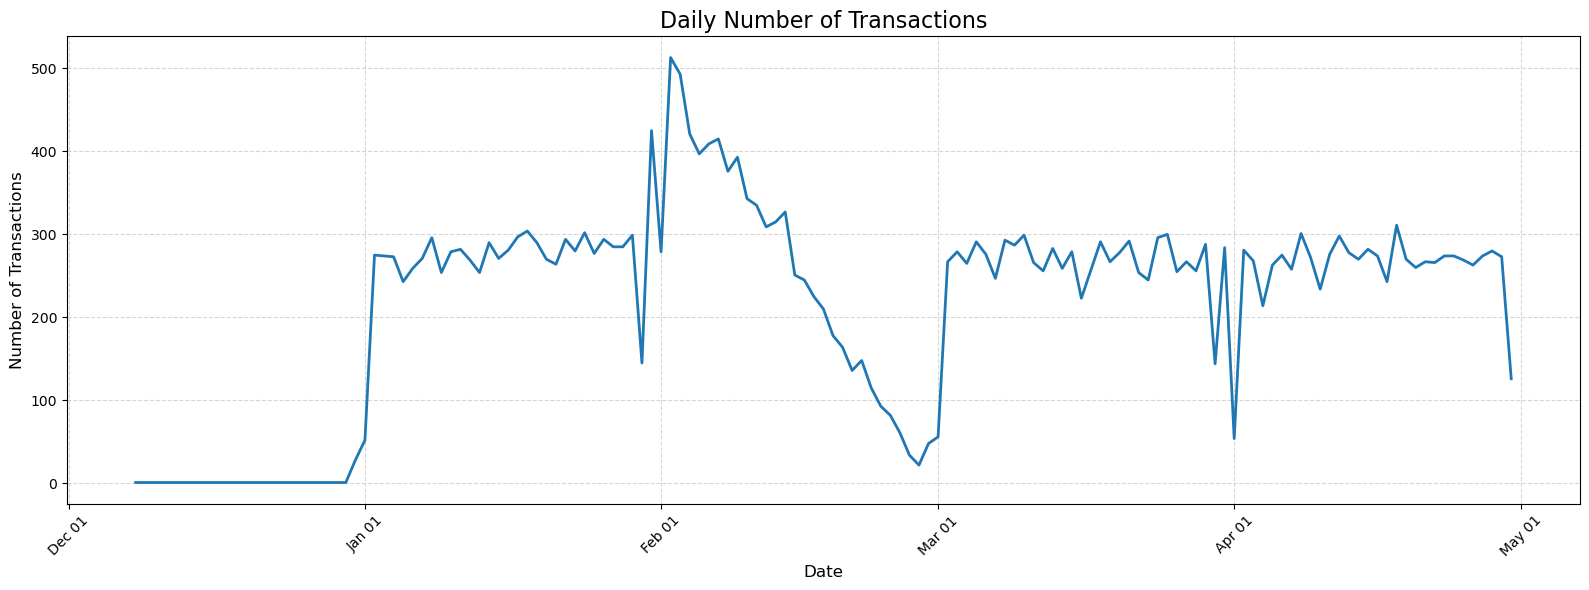

In [86]:
# Exclude the 'Grand Total' row for plotting
daily_tarnsactions = daily_tarnsactions_pt[:-1]

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(daily_tarnsactions['Purchase_Date'], daily_tarnsactions['Number of Transactions'], linewidth=2)

plt.title('Daily Number of Transactions', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Format the x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

><p style="line-height: 1.5;"><mark style="background-color:#F9E79F; color:#000000;">This chart is titled "Daily Number of Transactions" presents fluctuations in transaction volume over a period from January to May, with the x-axis representing the dates and the y-axis displaying the number of transactions, ranging from approximately 80 to 320.</mark> Several key observations can be made from the data. <span style="color:#58D68D;"><b>In January, the chart starts with a sharp increase in transactions, rising from around 80 on January 1st to nearly 300 within the first few days.</b></span> This surge is <span style="color:#AAB7B8;"><b>followed by a period of stability, with transaction numbers fluctuating between 270 and 300 throughout the month.</b></span> A noticeable dip occurs in mid-February, where transactions briefly fall below 250 before <span style="color:#AAB7B8;"><b>recovering to the 270–290 range.</b></span> <span style="color:#EC7063;"><b>March shows a more significant drop, with the number of transactions plummeting to approximately 80 on March 1st,</b></span> <span style="color:#AAB7B8;"><b>followed by a gradual recovery back to the previous stable range.</b></span> Similarly, <span style="color:#EC7063;"><b>a sharp decline is observed around April 1st, with transactions again dropping to around 80,</b></span> <span style="color:#AAB7B8;"><b>followed by a recovery to the 270–290 range.</b></span> The trend in May shows continued stability, with transaction numbers remaining around 270–290 and minor fluctuations. <mark style="background-color:#F9E79F; color:#000000;">Overall, the chart reveals a recurring pattern of sharp declines at the beginning of each month, followed by recoveries that stabilize the transaction count. These monthly dips suggest that cyclical or seasonal factors, such as billing cycles or holidays, may influence transaction volumes, with the system demonstrating resilience through consistent recovery after each decline.</mark></p>

<h4 style="color:#F9E79F;"><b>Q1. How is transaction volume trending over time?</b></h4>

<p style="line-height: 1.5;">Transaction volume exhibits a cyclical trend over time, characterized by recurring fluctuations throughout the observed period. <span style="color:#58D68D;"><b>The data reveals sharp increases in transaction volume at the beginning of each month,</b></span> <span style="color:#AAB7B8;"><b>followed by a gradual stabilization around a specific range, typically between 270 and 290 transactions.</b></span> However, <span style="color:#EC7063;"><b>periodic declines occur, notably at the start of January, March, and April, where the number of transactions drops significantly, sometimes falling to as low as 80.</b></span> These drops are generally short-lived, <span style="color:#AAB7B8;"><b>followed by a steady recovery that returns the transaction volume to the previously established range.</b></span> <mark style="background-color:#F9E79F; color:#000000;">The overall pattern suggests that while transaction volume experiences short-term disruptions, possibly due to seasonal or cyclical factors such as billing cycles or holidays, the system demonstrates resilience, with the volume consistently recovering after each dip. The data thus reflects both periodic fluctuations and underlying stability in transaction activity over time.</mark></p>

### <h3 style="color:#5DADE2;"><b>📈 2. Daily Revenue</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

#### Daily Revenue Pivot Table

In [87]:
# Ensure 'Date of Journey' is in datetime format
dim_journey['Journey_Date'] = pd.to_datetime(dim_journey['Journey_Date']).dt.date

# Merge fact_transactions with dim_journey to include 'Journey_Date'
merged_data = pd.merge(
    fact_transactions,
    dim_journey[['Journey_ID', 'Journey_Date']],
    on='Journey_ID',
    how='inner'
)

# Ensure the 'Price' column is numeric
merged_data['Price'] = pd.to_numeric(merged_data['Price'], errors='coerce')

In [88]:
# Create the pivot table
daily_revenue_pt = pd.pivot_table(
    merged_data,
    index='Journey_Date',
    values='Price',
    aggfunc='sum'
)

In [89]:
# Rename the column for clarity
daily_revenue_pt.columns = ['Daily Revenue']

# Reset index to make 'Journey_Date' a column (optional)
daily_revenue_pt.reset_index(inplace=True)

In [90]:
# Add a Grand Total row
grand_total = daily_revenue_pt['Daily Revenue'].sum()
grand_total_row = pd.DataFrame({'Journey_Date': ['Grand Total'], 'Daily Revenue': [grand_total]})
daily_revenue_with_total = pd.concat([daily_revenue_pt, grand_total_row], ignore_index=True)

In [91]:
daily_revenue_with_total

,Journey_Date,Daily Revenue
0,2024-01-01,1682
1,2024-01-02,4830
2,2024-01-03,7159
3,2024-01-04,7063
4,2024-01-05,5934
...,...,...
117,2024-04-27,6707
118,2024-04-28,6655
119,2024-04-29,5893
120,2024-04-30,5750


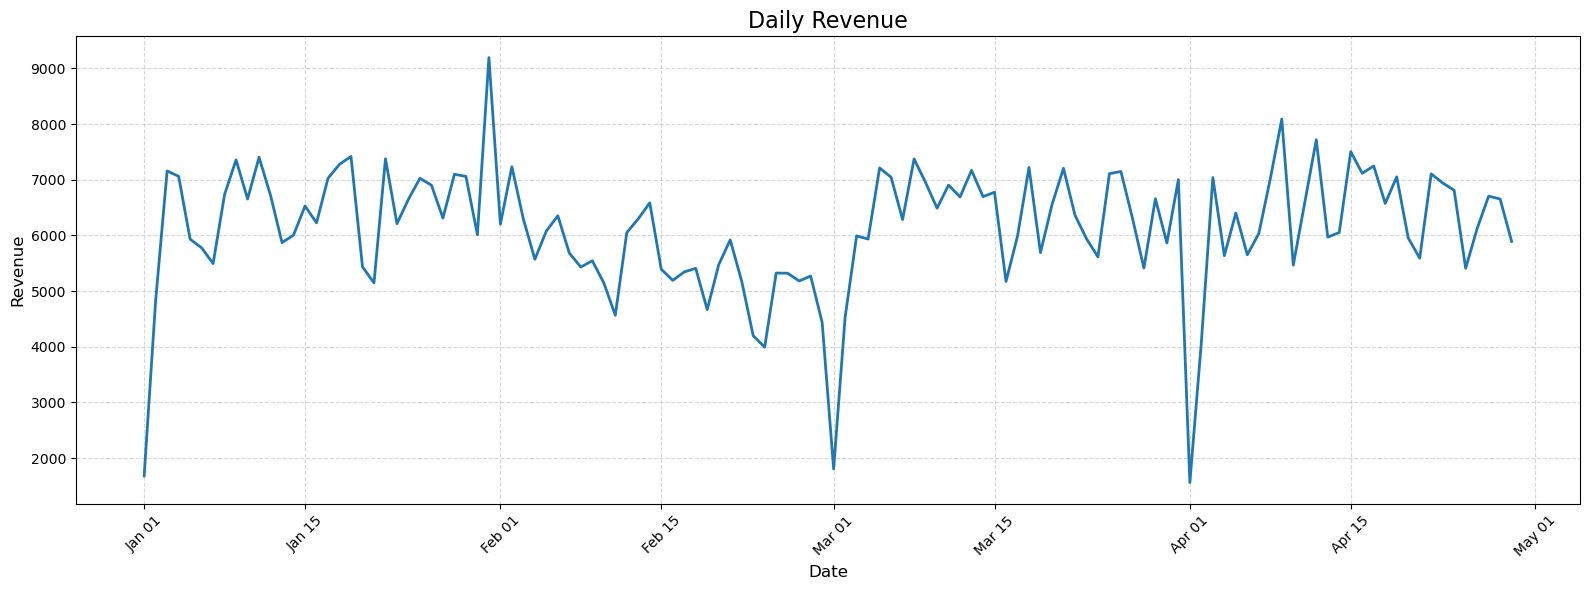

In [92]:
# Plot the pivot table
plt.figure(figsize=(16, 6))

# Exclude the 'Grand Total' row for plotting
daily_revenue = daily_revenue_pt[:-1]

plt.plot(daily_revenue['Journey_Date'], daily_revenue['Daily Revenue'], linewidth=2)

plt.title('Daily Revenue', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

# Format the x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

><p style="line-height: 1.5;"><mark style="background-color:#F9E79F; color:#000000;">This chart is titled “Daily Revenue” illustrates the fluctuations in revenue over the period from January to May, with the x-axis representing dates and the y-axis indicating revenue values ranging from approximately 2,000$ to 9,000$.</mark> <span style="color:#58D68D;"><b>During the initial phase in January, the chart shows a rapid increase in revenue from around 2,000$ on January 1st to nearly 7,000$ within the first few days,</b></span> <span style="color:#AAB7B8;"><b>followed by a period of relative stability between 6,500$ and 7,500$, with minor fluctuations.</b></span> <span style="color:#58D68D;"><b>A notable spike occurs around February 1st, where revenue peaks at nearly 9,000—the highest value within the observed timeframe</b></span> <span style="color:#EC7063;"><b>—before declining</b></span> and <span style="color:#AAB7B8;"><b>stabilizing between 6,000$ and 7,000$.</b></span> <span style="color:#EC7063;"><b>In March, a sharp decline is observed at the beginning of the month, dropping back to approximately 2,000$, which mirrors the revenue level seen at the start of January.</b></span> <span style="color:#EC7063;"><b>This pattern repeats in April, with another significant drop to 2,000$</b></span> <span style="color:#AAB7B8;"><b>followed by a gradual recovery. By May, the revenue demonstrates consistent stability within the 6,000$ to 7,000$ range, with no substantial dips or spikes.</b></span> <mark style="background-color:#F9E79F; color:#000000;">Overall, the chart reveals a recurring pattern of revenue declines at the beginning of specific months, followed by steady recoveries, suggesting the influence of cyclical or seasonal factors such as billing cycles or holidays. The prominent peak in early February may represent an outlier associated with a special event or promotion that temporarily boosted revenue. Despite these periodic disruptions, the general trend reflects a resilient system capable of recovering and maintaining stable revenue levels over time.</mark></p>

#### <h4 style="color:#F9E79F;"><b>Q2. How is revenue trending over time?</b></h4>

<p style="line-height: 1.5;">
    This chart is titled “Revenue Over Time” and demonstrates revenue trends from January to May, where the x-axis represents the dates and the y-axis indicates revenue values fluctuating between 2,000$ and 9,000$.
    <span style="color:#58D68D;"><b>Initially, revenue experiences a sharp rise in early January, stabilizing thereafter within a relatively high range.</b></span> 
    <span style="color:#58D68D;"><b>This is followed by a significant peak in early February, where revenue reaches its highest point—suggesting the influence of a one-time event such as a promotion or seasonal sale.</b></span> 
    <span style="color:#AAB7B8;"><b>After this peak, revenue returns to a steady range between 6,000$ and 7,000$.</b></span> 
    <span style="color:#EC7063;"><b>Sharp declines are observed at the beginning of both March and April, with revenue dropping to the minimum observed level of approximately 2,000$.</b></span> 
    <span style="color:#58D68D;"><b>In both instances, revenue quickly recovers and stabilizes again within the 6,000$ to 7,000$ range.</b></span> 
    <span style="color:#AAB7B8;"><b>By May, the revenue trend remains relatively stable, with no further extreme fluctuations.</b></span> 
    These recurring early-month drops followed by recovery suggest the presence of cyclical or seasonal factors—possibly billing cycles or scheduled events—that temporarily impact revenue performance. <mark style="background-color:#F9E79F; color:#000000;">Overall, while revenue shows periodic disruptions, the underlying trend demonstrates stability and the system’s capacity for rapid recovery.</mark>
</p>


### <h3 style="color:#5DADE2;"><b>📈 3. Number of Transactions by Hour of Day</b></h3>

<span style="color:#AAB7B8;"><i>depicts hourly transaction trends across a 24-hour period, revealing a clear diurnal pattern influenced by user routines.</i></span>

---

#### Number of Transactions by Hour of Day Pivot Table

In [93]:
# Combine 'Time_of_Purchase' time
dim_time['Time_of_Purchase'] = pd.to_datetime(
    '1970-01-01 ' + dim_time['Time_of_Purchase'].astype(str)
)

# Extract the hour from the timestamp
dim_time['Hour_of_Day'] = dim_time['Time_of_Purchase'].dt.hour

In [94]:
# Merge fact_transactions with dim_time
transactions_with_hours = pd.merge(
    fact_transactions,
    dim_time[['Time_ID', 'Hour_of_Day']],
    on='Time_ID',
    how='inner'
)

In [95]:
# Create the pivot table
transactions_day_pt = pd.pivot_table(
    transactions_with_hours,
    index='Hour_of_Day',
    values='Transaction_ID',
    aggfunc='count',
)

In [96]:
# Rename the column for clarity
transactions_day_pt.columns = ['Number of Transactions']

# Reset index to make 'Hour_of_Day' a column (optional)
transactions_day_pt.reset_index(inplace=True)

In [97]:
# Add a Grand Total row
grand_total = transactions_day_pt['Number of Transactions'].sum()
grand_total_row = pd.DataFrame({'Hour_of_Day': ['Grand Total'], 'Number of Transactions': [grand_total]})
transactions_day_pt_total = pd.concat([transactions_day_pt, grand_total_row], ignore_index=True)

In [98]:
transactions_day_pt_total

,Hour_of_Day,Number of Transactions
0,0,925
1,1,1032
2,2,642
3,3,1107
4,4,924
5,5,1566
6,6,1910
7,7,2046
8,8,2008
9,9,2070


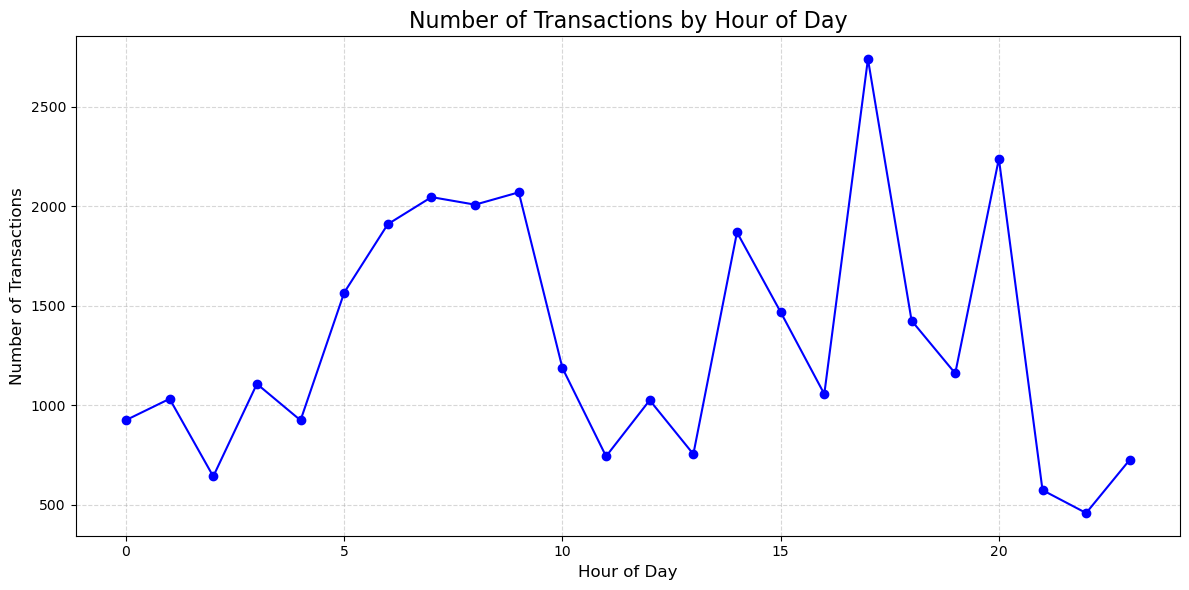

In [99]:
# Plot the pivot table
plt.figure(figsize=(12, 6))
plt.plot(transactions_day_pt['Hour_of_Day'], transactions_day_pt['Number of Transactions'], marker='o', linestyle='-', color='blue')

plt.title('Number of Transactions by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

><p style="line-height: 1.5;"><mark style="background-color:#F9E79F; color:#000000;">This chart titled “Number of Transactions by Hour of Day” depicts hourly transaction trends across a 24-hour period, revealing a clear diurnal pattern influenced by user routines.</mark> <span style="color:#58D68D;"><b>Transaction activity remains low during the early morning hours (00:00–06:00), with a gradual increase starting at 04:00 and rising to approximately 1,500 by 06:00,</b></span> <span style="color:#AAB7B8;"><b>followed by a sharp surge between 07:00 and 09:00, peaking at around 2,000 transactions, likely reflecting the start of the workday.</b></span> <span style="color:#58D68D;"><b>This is followed by a midday decline between 10:00 and 14:00, where volume stabilizes between 1,000 and 1,200, possibly due to reduced activity during lunch or midday breaks.</b></span> <span style="color:#EC7063;"><b>Transaction levels then climb again, reaching the day’s highest point—approximately 2,700—between 17:00 and 18:00,</b></span> <span style="color:#AAB7B8;"><b>which may correspond to end-of-day financial or consumer activity.</b></span> <span style="color:#EC7063;"><b>After this peak, the volume gradually declines, falling to around 1,500 by 20:00 and dropping further to 500–600 by midnight.</b></span> <mark style="background-color:#F9E79F; color:#000000;">The chart thus demonstrates two prominent peaks, in the morning and late afternoon, and consistent troughs during early morning and late evening, indicating that transaction patterns are closely aligned with typical daily human behavior and scheduling.</mark></p>

#### <h4 style="color:#F9E79F;"><b>Q3. What time of day has the highest transaction activity?</b></h4>

<p style="line-height: 1.5;">
<mark style="background-color:#F9E79F; color:#000000;">The time of day with the highest transaction activity occurs between 5:00 PM and 6:00 PM.</mark> According to the chart titled "Number of Transactions by Hour of Day," transaction volume rises steadily throughout the afternoon and reaches its peak during this period, <mark style="background-color:#F9E79F; color:#000000;">with the number of transactions reaching approximately 2,700—the highest observed value within the 24-hour cycle.</mark> This peak likely reflects increased financial or consumer activities typically associated with the end of the workday, such as shopping, bill payments, or other routine transactions. The timing suggests that user behavior is strongly influenced by daily schedules, with individuals engaging more actively in transactions after completing professional or academic obligations. <mark style="background-color:#F9E79F; color:#000000;">Consequently, the late afternoon emerges as the period of highest transaction intensity, highlighting the close relationship between transaction patterns and typical human routines.</mark></p>

### <h3 style="color:#5DADE2;"><b>📊 4. Revenue by Ticket Type</b></h3>

<span style="color:#AAB7B8;"><i>Chart presents a comparative analysis of the revenue generated from three categories of tickets: Advance, Anytime, and Off-Peak.</i></span>

---

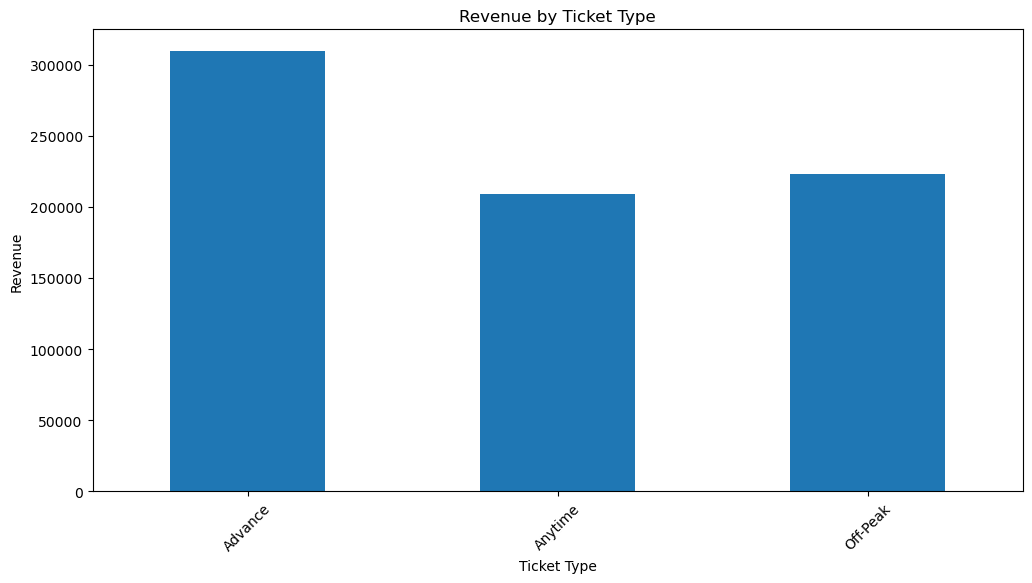

In [100]:
ticket_type_revenue = df.groupby('Ticket Type')['Price'].sum()
plt.figure(figsize=(12, 6))
ticket_type_revenue.plot(kind='bar')
plt.title('Revenue by Ticket Type')
plt.xlabel('Ticket Type')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

><p style="line-height: 1.5;"><mark style="background-color:#F9E79F; color:#000000;">This chart is titled "Revenue by Ticket Type" presents a comparative analysis of the revenue generated from three categories of tickets: Advance, Anytime, and Off-Peak.</mark> <span style="color:#58D68D;"><b>The x-axis categorizes the ticket types, while the y-axis quantifies the corresponding revenue, ranging up to approximately 310,000.</b></span> <span style="color:#AAB7B8;"><b>Advance tickets emerge as the most profitable category, generating revenue exceeding 300,000, significantly outperforming both off-peak and anytime tickets.</b></span> <span style="color:#58D68D;"><b>Off-peak tickets hold the second-highest position, contributing around 220,000,</b></span> <span style="color:#EC7063;"><b>while anytime tickets yield the lowest revenue at approximately 200,000, reflecting a clear disparity among the categories.</b></span> <span style="color:#58D68D;"><b>This pattern suggests a strong customer preference for advance purchasing, possibly motivated by discounted prices or the assurance of ticket availability,</b></span> <span style="color:#AAB7B8;"><b>whereas off-peak ticket sales reveal the effectiveness of catering to travelers during non-peak hours.</b></span> <span style="color:#EC7063;"><b>In contrast, the relatively lower revenue from anytime tickets may indicate a reduced demand for unrestricted travel options, warranting potential strategic adjustments to enhance their appeal.</b></span> <mark style="background-color:#F9E79F; color:#000000;">Overall, the chart underscores the critical role of advance ticket sales in maximizing revenue, while also highlighting the valuable contribution of off-peak options and identifying opportunities for optimizing anytime ticket offerings.</mark></p>

#### <h4 style="color:#F9E79F;"><b>Q4. Which ticket type generates the most revenue?</b></h4>

<p style="line-height: 1.5;">
<mark style="background-color:#F9E79F; color:#000000;">Among the ticket types analyzed, Advance tickets generate the highest revenue.</mark> The chart titled "Revenue by Ticket Type" illustrates that <span style="color:#58D68D;"><b>Advance tickets exceed 300,000 in revenue,</b></span>  significantly outperforming both Off-Peak and Anytime tickets. <span style="color:#AAB7B8;"><b>This dominance suggests that customers prefer purchasing tickets in advance, likely due to incentives such as lower pricing or guaranteed availability.</b></span> 
<span style="color:#58D68D;"><b>In contrast, Off-Peak tickets contribute approximately 220,000 and Anytime tickets around 200,000, both substantially lower than the revenue generated by Advance tickets.</b></span> 
<span style="color:#EC7063;"><b>The substantial gap highlights the critical financial importance of promoting advance ticket sales strategies to maximize overall revenue performance.</b></span> 
<mark style="background-color:#F9E79F; color:#000000;">Overall, the findings emphasize that Advance tickets are the most profitable option, playing a pivotal role in sustaining and enhancing the organization's financial outcomes.</mark>
</p>

### <h3 style="color:#5DADE2;"><b>📊 5. Revenue by Purchase Type and Ticket Type</b></h3>

<span style="color:#AAB7B8;"><i>Grouped bar chart that visualizes revenue generation based on two dimensions: Purchase Type (Online vs. Station) and Ticket Type (Advance, Anytime, Off-Peak).</i></span>

---

<Figure size 1500x800 with 0 Axes>

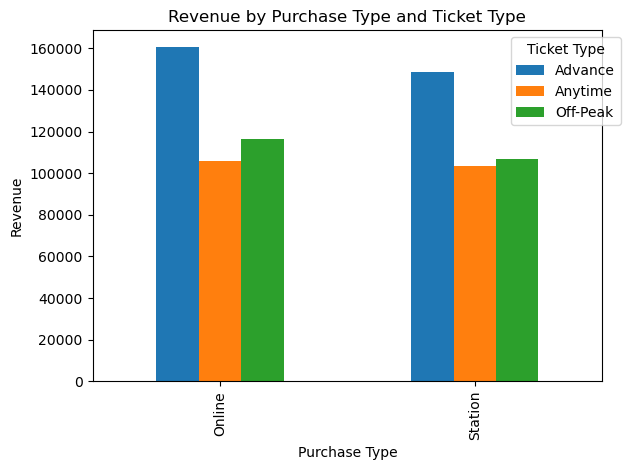

In [101]:
pivot_revenue = df.pivot_table(
    values='Price',
    index='Purchase Type',
    columns='Ticket Type',
    aggfunc='sum'
)
plt.figure(figsize=(15, 8))
pivot_revenue.plot(kind='bar')
plt.title('Revenue by Purchase Type and Ticket Type')
plt.xlabel('Purchase Type')
plt.ylabel('Revenue')
plt.legend(title='Ticket Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

><p style="line-height: 1.5;">This chart is titled <mark style="background-color:#D6EAF8; color:#000000;"><b>"Revenue by Purchase Type and Ticket Type"</b></mark> is a grouped bar chart that visualizes revenue generation based on two dimensions: <b>Purchase Type</b> (Online vs. Station) and <b>Ticket Type</b> (Advance, Anytime, Off-Peak). The y-axis measures the revenue in monetary terms, while the x-axis categorizes data by purchase type. <span style="color:#58D68D;"><b>Key observations reveal that online purchases consistently generate higher revenue than station purchases across all ticket types.</b></span> <mark style="background-color:#FCF3CF; color:#000000;">Among online purchases, Advance tickets lead by exceeding 160,000, followed by Off-Peak at approximately 115,000, and Anytime tickets at around 105,000.</mark> Similarly, <span style="color:#5DADE2;"><b>station purchases show Advance tickets as the highest contributor, nearing 150,000, with Off-Peak and Anytime trailing at approximately 105,000 and 100,000 respectively.</b></span> <mark style="background-color:#F9E79F; color:#000000;">Comparative analysis indicates that Advance tickets consistently generate the highest revenue across both purchase methods, emphasizing their dominance in revenue generation.</mark> Meanwhile, <span style="color:#AAB7B8;">Off-Peak and Anytime tickets exhibit smaller revenue differences, though Off-Peak generally performs slightly better.</span> <mark style="background-color:#FADBD8; color:#000000;">The overall pattern highlights the importance of focusing on online sales channels and promoting Advance ticket options to maximize financial performance.</mark> Furthermore, <span style="color:#EC7063;"><b>enhancing the appeal of Anytime and Off-Peak tickets through pricing strategies or marketing initiatives could potentially elevate their revenue contributions.</b></span> In conclusion, the data underscores the critical role of optimizing online sales platforms and prioritizing advance ticket promotions to drive higher revenue outcomes.</p>

#### <h4 style="color:#F9E79F;"><b>Q5. Which combinations of ticket and purchase types bring in the most revenue?</b></h4>

<p style="line-height: 1.5;">
The combination of <mark style="background-color:#D6EAF8; color:#000000;"><b>Advance tickets purchased online</b></mark> generates the highest revenue among all ticket and purchase type combinations. 
<span style="color:#58D68D;"><b>Key observations reveal that online purchases consistently outperform station purchases across all ticket types, especially for Advance tickets.</b></span> 
<mark style="background-color:#FCF3CF; color:#000000;">Advance tickets bought online exceed 160,000 in revenue, noticeably higher than any other combination, while Advance tickets purchased at stations follow closely, nearing 150,000.</mark> 
Similarly, <span style="color:#5DADE2;"><b>Off-Peak and Anytime tickets, whether bought online or at stations, generate lower revenues, with Off-Peak slightly outperforming Anytime across both platforms.</b></span> 
<mark style="background-color:#F9E79F; color:#000000;">This pattern emphasizes the dominance of Advance tickets in driving overall revenue, regardless of purchase location.</mark> 
Moreover, <span style="color:#AAB7B8;">the differences between Off-Peak and Anytime revenues are relatively minor but still favor Off-Peak options.</span> 
<mark style="background-color:#FADBD8; color:#000000;">The data clearly highlights the strategic importance of promoting Advance ticket sales, particularly through online channels, to maximize financial performance.</mark> 
Additionally, <span style="color:#EC7063;"><b>there is potential to boost overall revenue by enhancing the attractiveness of Off-Peak and Anytime tickets through targeted marketing and pricing strategies.</b></span> 
In conclusion, focusing on online platforms and reinforcing Advance ticket promotions appears essential for optimizing revenue outcomes.
</p>

### <h3 style="color:#5DADE2;"><b>🔘 6. Number of Transactions by Purchase Type</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

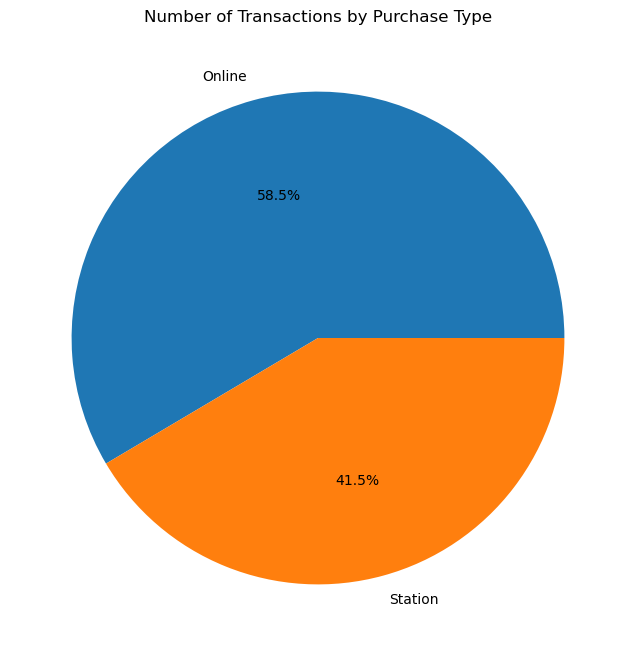

In [102]:
# 7. Number of Transactions by Purchase Type
purchase_type_counts = df['Purchase Type'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(purchase_type_counts, labels=purchase_type_counts.index, autopct='%1.1f%%')
plt.title('Number of Transactions by Purchase Type')
plt.show()

The chart titled "Number of Transactions by Purchase Type" is a pie chart that illustrates the distribution of transactions based on the purchase type. The chart is divided into two segments, each representing a different purchase type:

##### Key Observations:

1. **Purchase Types:**
   - There are two categories:
     - **Online:** Represented by the blue segment.
     - **Station:** Represented by the orange segment.

2. **Percentage Distribution:**
   - **Online:** Accounts for **58.5%** of the total transactions.
   - **Station:** Accounts for **41.5%** of the total transactions.

##### Visual Breakdown:
- The blue segment (Online) occupies a significantly larger portion of the pie chart, indicating that online transactions dominate the overall transaction volume.
- The orange segment (Station) represents a smaller but still substantial portion of the transactions.

##### Insights:
- **Dominance of Online Transactions:** Online purchases constitute the majority of transactions, accounting for nearly 60% of the total. This suggests that customers prefer conducting transactions through digital channels.
- **Station Transactions as a Significant Contributor:** While station transactions make up a smaller share compared to online transactions, they still represent a notable portion (41.5%) of the total transactions. This indicates that physical stations remain an important channel for some users.

##### Implications:
- **Focus on Digital Channels:** The high percentage of online transactions highlights the importance of maintaining and enhancing online platforms to cater to customer preferences.
- **Continued Support for Station Purchases:** Despite being less dominant, station transactions still play a significant role. Ensuring that station-based services are efficient and user-friendly can help retain customers who prefer in-person interactions.
- **Potential for Growth in Both Channels:** While online transactions already lead, there may be opportunities to further optimize both online and station-based processes to increase overall transaction volumes.

In summary, this chart emphasizes the growing preference for online transactions while also acknowledging the continued relevance of station-based purchases. Balancing investments in both channels could help maximize overall transaction efficiency and customer satisfaction.

### <h3 style="color:#5DADE2;"><b>📊 7. Railcard Usage</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

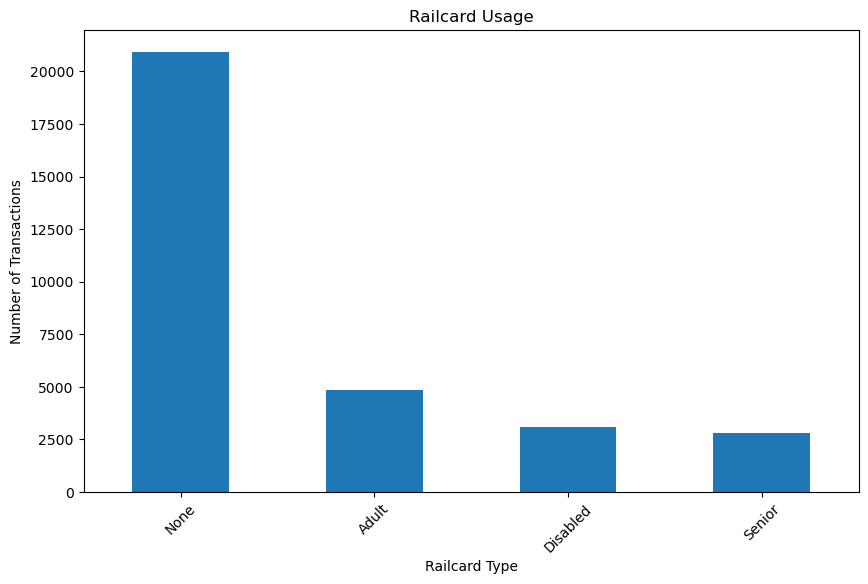

In [103]:
railcard_usage = df['Railcard'].value_counts()
plt.figure(figsize=(10, 6))
railcard_usage.plot(kind='bar')
plt.title('Railcard Usage')
plt.xlabel('Railcard Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

The chart titled "Railcard Usage" is a bar chart that illustrates the number of transactions based on different railcard types. The x-axis represents the railcard types, which include **None**, **Adult**, **Disabled**, and **Senior**. The y-axis represents the number of transactions, ranging from 0 to approximately 21,000.

##### Key Observations:

1. **Railcard Type:**
   - There are four categories along the x-axis:
     - **None:** Refers to transactions where no railcard was used.
     - **Adult:** Refers to transactions using an adult railcard.
     - **Disabled:** Refers to transactions using a disabled railcard.
     - **Senior:** Refers to transactions using a senior railcard.

2. **Number of Transactions:**
   - **None:** This category has the highest number of transactions, exceeding 20,000.
   - **Adult:** Has approximately 5,000 transactions.
   - **Disabled:** Has around 2,500 transactions.
   - **Senior:** Also has around 2,500 transactions.

##### Comparisons:

- **Dominance of "None":**
  - The majority of transactions (over 20,000) fall under the "None" category, indicating that most users do not utilize any railcard for their transactions.
  
- **Significant Difference Between Categories:**
  - The "None" category significantly outperforms all other categories in terms of transaction volume.
  - The "Adult" category follows with approximately 5,000 transactions, which is considerably higher than the "Disabled" and "Senior" categories.
  - Both "Disabled" and "Senior" categories have similar transaction volumes, each around 2,500.

##### Overall Pattern:
- **Low Railcard Usage:** The data suggests that railcards are not widely used by customers, as the "None" category accounts for the vast majority of transactions.
- **Limited Use of Specific Railcards:** While adult railcards are used more frequently compared to disabled and senior railcards, their usage is still relatively low compared to transactions without any railcard.

##### Implications:
- **Focus on Non-Railcard Users:** Since the majority of transactions involve no railcard, efforts to understand and cater to this group could be crucial for improving overall customer engagement or revenue.
- **Promotion of Railcards:** The low usage of railcards (especially disabled and senior railcards) may indicate a need for better awareness or incentives to encourage their adoption. Targeted campaigns could help increase the utilization of these railcards.
- **Potential for Growth:** While adult railcards already show some usage, there is room for growth in both disabled and senior railcard usage, potentially through discounts, promotions, or improved accessibility features.

In summary, the chart highlights the dominance of transactions without railcards, while usage of specific railcards remains limited. Strategic initiatives could focus on increasing railcard adoption among targeted groups to enhance customer satisfaction and potentially boost revenue.

### <h3 style="color:#5DADE2;"><b>📊 8. Average Price by Ticket Type</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

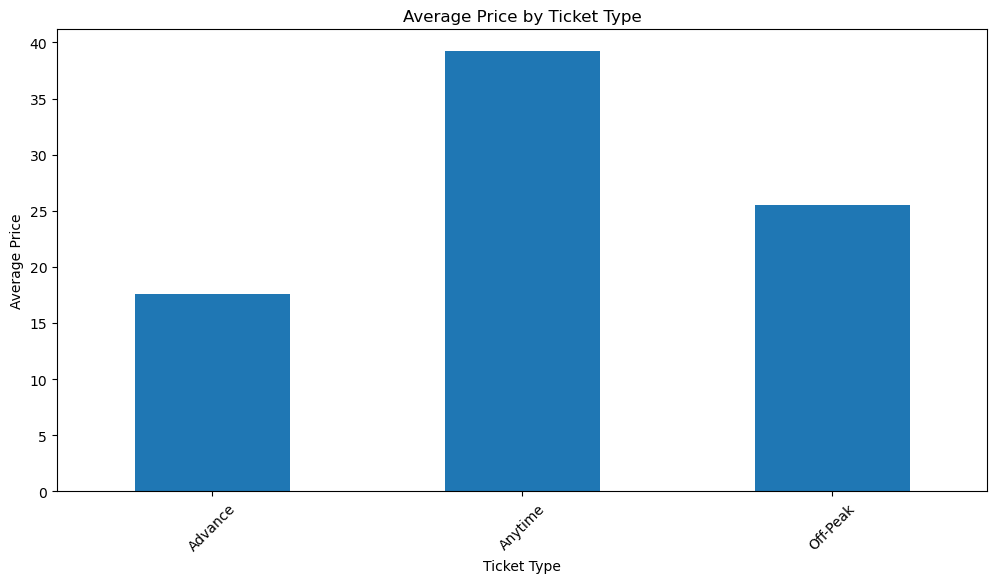

In [104]:
avg_price_by_ticket = df.groupby('Ticket Type')['Price'].mean()
plt.figure(figsize=(12, 6))
avg_price_by_ticket.plot(kind='bar')
plt.title('Average Price by Ticket Type')
plt.xlabel('Ticket Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


The chart titled "Average Price by Ticket Type" is a bar chart that illustrates the average price of tickets based on different ticket types. The x-axis represents the ticket types, which include **Advance**, **Anytime**, and **Off-Peak**. The y-axis represents the average price, ranging from 0 to approximately 40.

##### Key Observations:

1. **Ticket Types:**
   - There are three categories along the x-axis:
     - **Advance:** Refers to advance-purchase tickets.
     - **Anytime:** Refers to tickets that can be used at any time.
     - **Off-Peak:** Refers to tickets valid only during off-peak hours.

2. **Average Prices:**
   - **Advance:** Has an average price of approximately **18**.
   - **Anytime:** Has the highest average price, around **39**.
   - **Off-Peak:** Has an average price of approximately **25**.

##### Comparisons:

- **Highest Average Price:**
  - The **Anytime** ticket type has the highest average price, significantly outperforming the other two categories. This suggests that anytime tickets are the most expensive option.

- **Moderate Average Price:**
  - The **Off-Peak** ticket type has a moderate average price, falling between the Advance and Anytime categories. It is considerably higher than the Advance tickets but lower than the Anytime tickets.

- **Lowest Average Price:**
  - The **Advance** ticket type has the lowest average price among the three categories. This indicates that purchasing tickets in advance offers a cost advantage compared to other options.

##### Overall Pattern:
- **Cost Advantage of Advance Tickets:** Advance tickets are the least expensive, suggesting that customers who book in advance benefit from discounted pricing or early-bird offers.
- **Premium Pricing for Anytime Tickets:** Anytime tickets are the most expensive, likely due to their flexibility (allowing use at any time). This reflects a premium pricing strategy for added convenience.
- **Balanced Pricing for Off-Peak Tickets:** Off-peak tickets offer a middle ground in terms of pricing. They are more expensive than advance tickets but less expensive than anytime tickets, indicating a trade-off between cost and usage restrictions.

##### Implications:
- **Encouraging Advance Purchases:** The lower price of advance tickets could incentivize customers to plan ahead and book early, benefiting both the customer and the service provider through increased predictability and revenue stability.
- **Targeted Marketing for Anytime Tickets:** Given the high price of anytime tickets, marketing efforts could focus on highlighting the value proposition of flexibility and convenience to attract customers willing to pay a premium.
- **Promoting Off-Peak Tickets:** Off-peak tickets provide a balance between cost and usability. Offering promotions or discounts for off-peak travel could encourage customers to shift their travel patterns, potentially reducing congestion during peak hours while increasing overall ticket sales.

In summary, this chart demonstrates clear differences in pricing strategies across ticket types, with advance tickets being the most affordable, anytime tickets being the most expensive, and off-peak tickets offering a balanced option. These insights can guide pricing decisions and promotional strategies to optimize revenue and customer satisfaction.

### <h3 style="color:#5DADE2;"><b>🔘 9. Revenue Distribution by Ticket Class</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

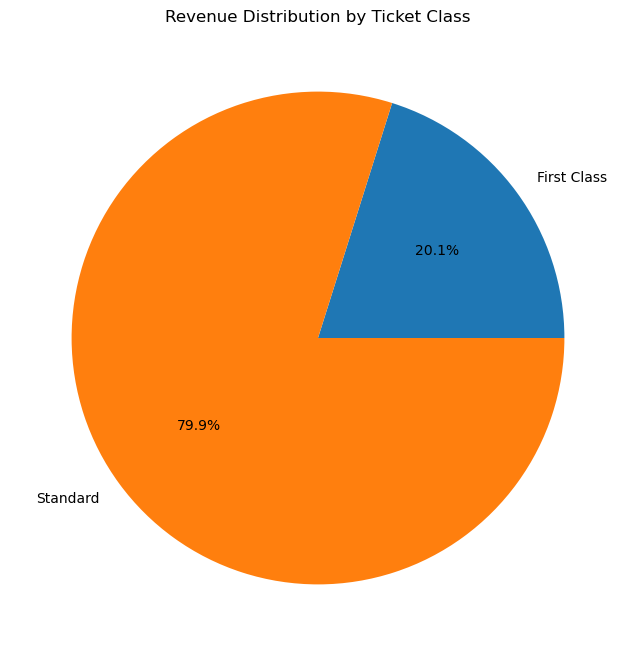

In [105]:
ticket_class_revenue = df.groupby('Ticket Class')['Price'].sum()
plt.figure(figsize=(10, 8))
plt.pie(ticket_class_revenue, labels=ticket_class_revenue.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by Ticket Class')
plt.show()


The chart titled "Revenue Distribution by Ticket Class" is a pie chart that illustrates the revenue distribution based on two ticket classes: **Standard** and **First Class**. Here's a detailed description of the chart:

##### Key Observations:

1. **Ticket Classes:**
   - The chart is divided into two segments, each representing a different ticket class:
     - **Standard:** Represented by the orange segment.
     - **First Class:** Represented by the blue segment.

2. **Revenue Distribution:**
   - **Standard:** Accounts for **79.9%** of the total revenue. This is the dominant segment in the chart, occupying the majority of the pie.
   - **First Class:** Accounts for **20.1%** of the total revenue. This segment is significantly smaller compared to the Standard class.

##### Visual Breakdown:
- The orange segment (Standard) occupies a large portion of the pie chart, indicating that the majority of revenue comes from standard tickets.
- The blue segment (First Class) represents a smaller portion of the pie, reflecting its lower contribution to overall revenue.

##### Insights:
- **Dominance of Standard Tickets:** Standard tickets generate the overwhelming majority of revenue, contributing nearly 80% of the total. This suggests that standard tickets are the most popular or widely used option among customers.
- **Contribution of First-Class Tickets:** While first-class tickets contribute only 20.1% of the revenue, they still play a significant role in the overall revenue stream. Their relatively high price likely compensates for their lower volume.

##### Implications:
- **Focus on Standard Tickets:** Since standard tickets account for the largest share of revenue, efforts to optimize pricing, availability, and customer experience for this class could have a substantial impact on overall revenue.
- **Value of First-Class Tickets:** Despite generating less revenue than standard tickets, first-class tickets may offer higher profit margins due to their premium pricing. Maintaining or enhancing the quality and appeal of first-class services could help sustain or even increase their contribution to revenue.
- **Potential for Growth:** There may be opportunities to further diversify revenue streams by introducing new ticket classes or enhancing existing ones to cater to different customer preferences and willingness to pay.

##### Summary:
This pie chart clearly shows that **standard tickets** dominate the revenue distribution, accounting for 79.9% of the total, while **first-class tickets** contribute the remaining 20.1%. The data highlights the importance of standard tickets as the primary driver of revenue, while also acknowledging the valuable role of first-class tickets in generating additional income. Strategic decisions should consider these proportions when planning pricing, promotions, and service improvements.

### <h3 style="color:#5DADE2;"><b>📊 10. Top 5 Departure Stations by Revenue</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

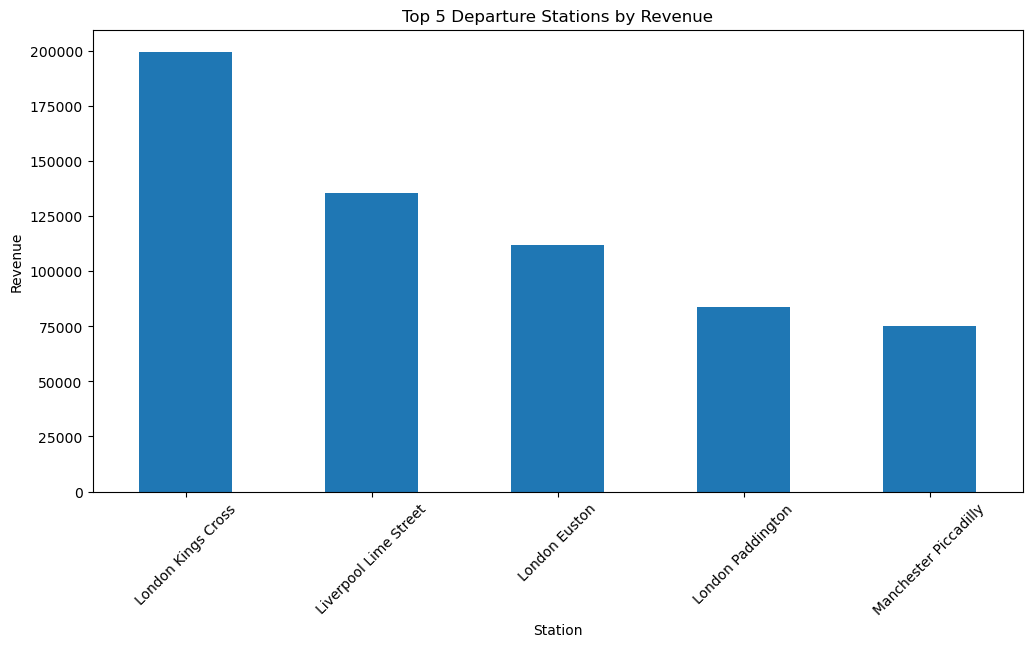

In [ ]:
station_revenue = df.groupby('Departure Station')['Price'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
station_revenue.plot(kind='bar')
plt.title('Revenue By Departure Station')
plt.xlabel('Station')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


The chart titled "Top 5 Departure Stations by Revenue" is a bar chart that illustrates the revenue generated by the top five departure stations. Here's a detailed description of the chart:

##### Key Observations:

1. **Stations:**
   - The x-axis lists the names of the top five departure stations:
     - **London Kings Cross**
     - **Liverpool Line Street**
     - **London Euston**
     - **London Paddington**
     - **Manchester Piccadilly**

2. **Revenue:**
   - The y-axis represents the revenue in monetary terms, ranging from 0 to approximately 200,000.

3. **Revenue Distribution:**
   - **London Kings Cross:** Generates the highest revenue, exceeding **200,000**.
   - **Liverpool Line Street:** Has the second-highest revenue, around **130,000**.
   - **London Euston:** Contributes approximately **110,000** in revenue.
   - **London Paddington:** Has a revenue of roughly **80,000**.
   - **Manchester Piccadilly:** Generates the lowest revenue among the top five, with approximately **70,000**.

##### Visual Breakdown:
- The blue bars represent the revenue for each station.
- **London Kings Cross** stands out as the leading station in terms of revenue, significantly surpassing the others.
- The other stations follow in descending order of revenue: Liverpool Line Street, London Euston, London Paddington, and Manchester Piccadilly.

##### Insights:
- **Dominance of London Kings Cross:** This station generates substantially more revenue than any other station listed, indicating its importance as a major hub or gateway for travel.
- **Significant Contribution of Major London Stations:** Three of the top five stations are located in London (Kings Cross, Liverpool Line Street, and Euston), highlighting the city's central role in generating revenue.
- **Regional Importance of Manchester Piccadilly:** While it contributes less revenue compared to the London stations, Manchester Piccadilly still plays a notable role as a key regional hub.

##### Implications:
- **Focus on High-Revenue Stations:** Given that London Kings Cross generates the most revenue, strategies to optimize operations, enhance customer experience, and increase ticket sales at this station could have a significant impact on overall revenue.
- **Balancing Regional and National Hubs:** While London stations dominate the list, ensuring that regional hubs like Manchester Piccadilly remain competitive and well-supported is crucial for maintaining balanced revenue streams across different regions.
- **Potential for Growth:** Identifying factors contributing to the high revenue at London Kings Cross (e.g., location, frequency of services, demand) could provide insights into how other stations might improve their performance.

##### Summary:
This bar chart clearly shows that **London Kings Cross** is the top-performing departure station in terms of revenue, followed by Liverpool Line Street, London Euston, London Paddington, and Manchester Piccadilly. The data underscores the critical role of major London stations in revenue generation, while also highlighting the significance of regional hubs like Manchester Piccadilly. Strategic decisions should focus on leveraging the strengths of these stations to maximize overall revenue.

### <h3 style="color:#5DADE2;"><b>🔘 11. Payment Method Distribution</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

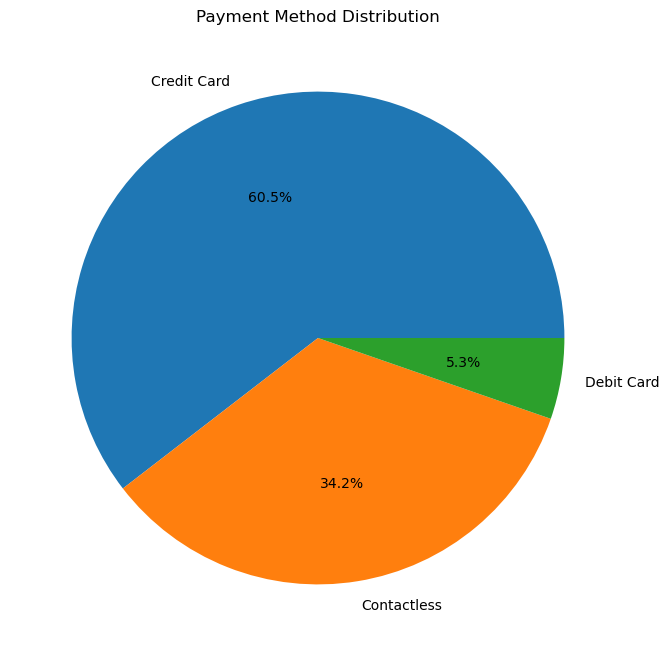

In [ ]:
payment_method_dist = df['Payment Method'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(payment_method_dist, labels=payment_method_dist.index, autopct='%1.1f%%')
plt.title('Payment Method')
plt.show()

The chart titled "Payment Method Distribution" is a pie chart that illustrates the distribution of payment methods used for transactions. Here's a detailed description of the chart:

##### Key Observations:

1. **Payment Methods:**
   - The chart is divided into three segments, each representing a different payment method:
     - **Credit Card:** Represented by the blue segment.
     - **Contactless:** Represented by the orange segment.
     - **Debit Card:** Represented by the green segment.

2. **Percentage Distribution:**
   - **Credit Card:** Accounts for **60.5%** of the total payments, making it the most dominant payment method.
   - **Contactless:** Has a share of **34.2%**, indicating it is the second-most popular payment method.
   - **Debit Card:** Contributes only **5.3%** to the total payments, making it the least utilized payment method among the three.

##### Visual Breakdown:
- The blue segment (Credit Card) occupies the largest portion of the pie chart, clearly dominating the distribution.
- The orange segment (Contactless) represents a significant but smaller portion compared to Credit Card.
- The green segment (Debit Card) is the smallest, occupying only a small fraction of the pie.

##### Insights:
- **Dominance of Credit Cards:** Credit cards are overwhelmingly the preferred payment method, accounting for over 60% of all transactions. This suggests that customers are highly inclined to use credit cards for their payments, possibly due to convenience, rewards programs, or other benefits associated with credit card usage.
- **Significant Use of Contactless Payments:** Contactless payments represent a substantial portion (34.2%) of the total transactions. This indicates growing adoption of quick and convenient contactless payment options, likely driven by technological advancements and user preference for speed and ease.
- **Low Utilization of Debit Cards:** Debit cards have the lowest usage among the three payment methods, contributing only 5.3%. This could be due to various factors, such as limited rewards or incentives compared to credit cards, or lower acceptance rates at certain merchants.

##### Implications:
- **Focus on Credit Cards:** Given the high dominance of credit cards, strategies to enhance customer satisfaction and loyalty through credit card rewards, promotions, or improved services could further boost revenue and customer retention.
- **Encouraging Contactless Payments:** The significant use of contactless payments highlights the importance of investing in technology and infrastructure to support this payment method. Promoting its convenience and security could help maintain or increase its popularity.
- **Addressing Debit Card Usage:** While debit cards have low usage, efforts to improve their appeal (e.g., offering competitive features or discounts) could help increase their adoption rate. Understanding why customers prefer other payment methods over debit cards could provide insights for improvement.

##### Summary:
This pie chart shows that **credit cards** are the most widely used payment method, accounting for 60.5% of transactions, followed by **contactless payments** at 34.2%, and **debit cards** at 5.3%. The data underscores the strong preference for credit cards and the growing adoption of contactless payments, while highlighting the need to address the low utilization of debit cards. Strategic decisions should focus on leveraging the strengths of credit cards and contactless payments while exploring ways to enhance the appeal of debit cards.

### <h3 style="color:#5DADE2;"><b>🥧 12. Journey Status Distribution</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

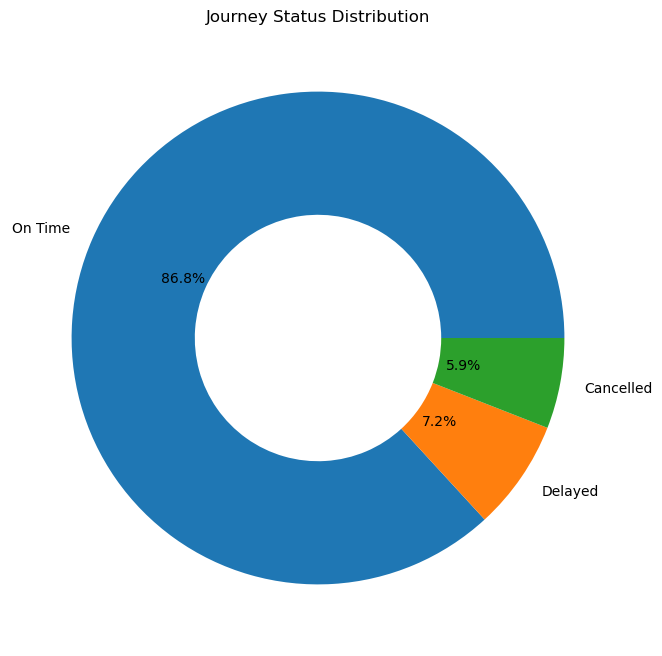

In [108]:
journey_status_dist = df['Journey Status'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(journey_status_dist, labels=journey_status_dist.index, autopct='%1.1f%%', 
        wedgeprops=dict(width=0.5))
plt.title('Journey Status Distribution')
plt.show()

The chart titled "Journey Status Distribution" is a pie chart that illustrates the distribution of journey statuses. Here's a detailed description of the chart:

##### Key Observations:

1. **Journey Status Categories:**
   - The chart is divided into three segments, each representing a different journey status:
     - **On Time:** Represented by the blue segment.
     - **Delayed:** Represented by the orange segment.
     - **Cancelled:** Represented by the green segment.

2. **Percentage Distribution:**
   - **On Time:** Accounts for **86.8%** of all journeys, making it the dominant category.
   - **Delayed:** Has a share of **7.2%**, indicating a relatively small portion of delayed journeys.
   - **Cancelled:** Contributes only **5.9%** to the total, representing the smallest segment.

##### Visual Breakdown:
- The blue segment (On Time) occupies the vast majority of the pie chart, clearly dominating the distribution.
- The orange segment (Delayed) represents a smaller portion but is still noticeable.
- The green segment (Cancelled) is the smallest, occupying only a tiny fraction of the pie.

##### Insights:
- **High Reliability of On-Time Journeys:** The overwhelming majority (86.8%) of journeys are completed on time, indicating a high level of reliability and efficiency in the transportation system.
- **Low Incidence of Delays:** Delayed journeys account for 7.2%, suggesting that delays are relatively infrequent but still present.
- **Minimal Cancellations:** Cancelled journeys make up only 5.9% of the total, indicating that cancellations are rare and well-managed.

##### Implications:
- **Focus on Maintaining High Reliability:** Given the dominance of on-time journeys, efforts should continue to ensure punctuality and minimize disruptions. This could involve improving scheduling, infrastructure, or operational processes.
- **Addressing Delays:** While delays are infrequent, their impact can be significant for affected passengers. Identifying and addressing the root causes of delays (e.g., weather, technical issues, or staffing shortages) could further enhance customer satisfaction.
- **Managing Cancellations:** With cancellations being minimal, the focus should be on maintaining this low rate. Ensuring robust contingency plans and effective communication during unexpected events can help mitigate the impact of cancellations.

##### Summary:
This pie chart shows that **on-time journeys** are overwhelmingly dominant, accounting for 86.8% of all journeys. **Delayed journeys** represent 7.2%, while **cancelled journeys** make up only 5.9%. The data highlights the strong performance of the transportation system in terms of reliability, with delays and cancellations being relatively rare occurrences. Strategic efforts should focus on sustaining high punctuality rates while continuously improving service quality to address any potential disruptions.

### <h3 style="color:#5DADE2;"><b>📊 13. Revenue by Ticket Type</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

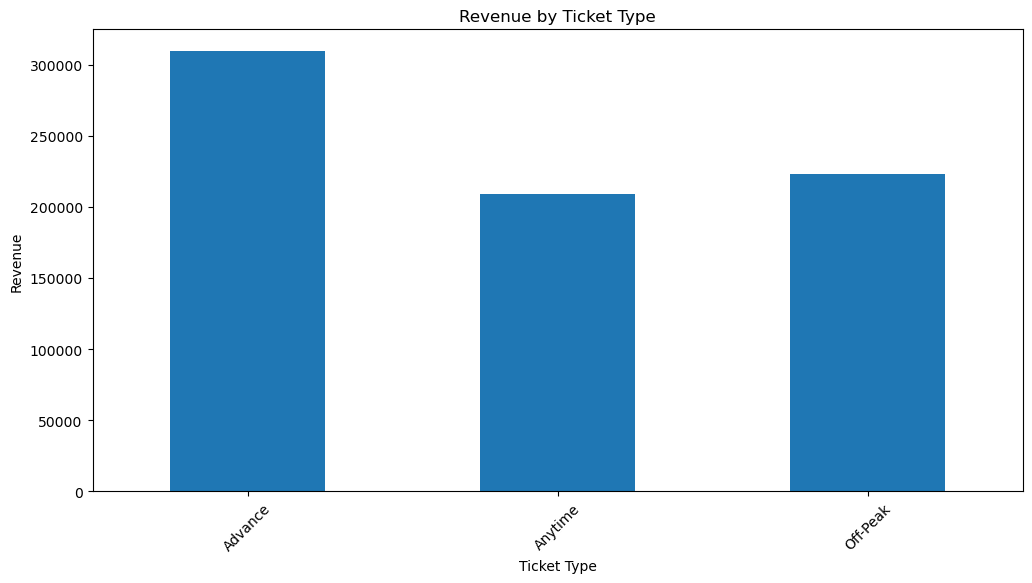

In [109]:
plt.figure(figsize=(12, 6))
ticket_type_revenue.plot(kind='bar')
plt.title('Revenue by Ticket Type')
plt.xlabel('Ticket Type')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

The chart titled "Revenue by Ticket Type" is a bar chart that illustrates the revenue generated from different types of tickets. Here's a detailed description of the chart:

##### Key Observations:

1. **Ticket Types:**
   - The x-axis represents three categories of ticket types:
     - **Advance:** Tickets purchased in advance.
     - **Anytime:** Tickets valid at any time.
     - **Off-Peak:** Tickets valid only during off-peak hours.

2. **Revenue:**
   - The y-axis represents the revenue in monetary terms, ranging from 0 to approximately 310,000.

3. **Bar Heights:**
   - **Advance:** This category has the highest revenue, exceeding **300,000**.
   - **Off-Peak:** This category has the second-highest revenue, around **220,000**.
   - **Anytime:** This category has the lowest revenue among the three, approximately **200,000**.

##### Visual Breakdown:
- The blue bars represent the revenue for each ticket type.
- The **Advance** ticket type stands out as the leading contributor to revenue, significantly surpassing the other two categories.
- The **Off-Peak** ticket type follows with a moderate revenue, while the **Anytime** ticket type generates the least revenue.

##### Insights:
- **Dominance of Advance Tickets:** Advance tickets generate the highest revenue, indicating that customers are heavily inclined to purchase tickets in advance. This could be due to factors such as discounted pricing or guaranteed availability.
- **Moderate Revenue from Off-Peak Tickets:** Off-peak tickets contribute a substantial amount of revenue, suggesting that offering tickets during non-peak hours is effective in attracting customers and generating income.
- **Lower Revenue from Anytime Tickets:** Anytime tickets, while still contributing to revenue, generate the least among the three categories. This might indicate that customers prefer more specific options (advance or off-peak) over the flexibility offered by anytime tickets.

##### Implications:
- **Focus on Advance Tickets:** Since advance tickets are the primary driver of revenue, strategies to encourage early booking (e.g., promotions, discounts, or better visibility) could further boost overall revenue.
- **Optimizing Off-Peak Tickets:** While off-peak tickets already generate significant revenue, efforts to enhance their appeal (e.g., competitive pricing or targeted marketing) could help increase their contribution.
- **Addressing Anytime Tickets:** The lower revenue from anytime tickets suggests potential areas for improvement. Understanding why customers prefer other ticket types over anytime tickets could provide insights for enhancing its attractiveness.

##### Summary:
This bar chart highlights that **advance tickets** are the most lucrative, followed by **off-peak tickets**, with **anytime tickets** generating the least revenue. The data underscores the importance of advance bookings and the effectiveness of off-peak ticket offerings. Strategic decisions should focus on leveraging the strengths of advance tickets while exploring ways to improve the performance of anytime tickets.

### <h3 style="color:#5DADE2;"><b>🔘 14. Revenue Distribution by Ticket Class</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

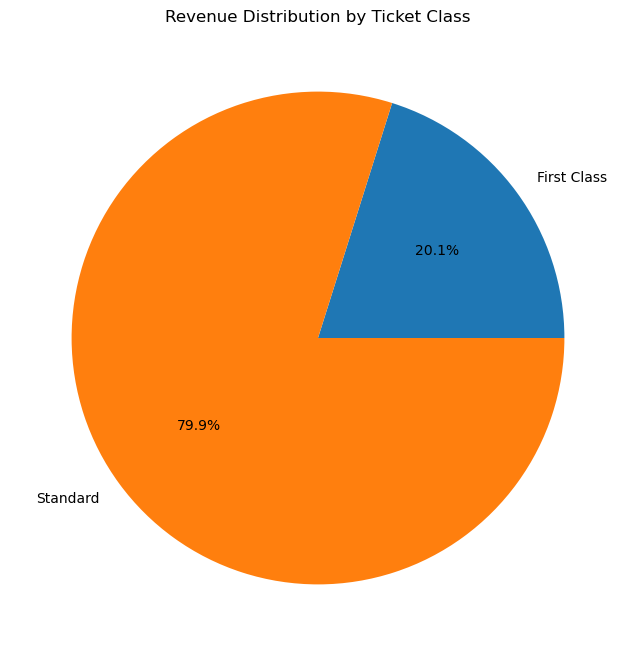

In [110]:
plt.figure(figsize=(10, 8))
plt.pie(ticket_class_revenue, labels=ticket_class_revenue.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by Ticket Class')
plt.show()

The chart titled "Revenue Distribution by Ticket Class" is a pie chart that illustrates the revenue distribution based on two ticket classes: **Standard** and **First Class**. Here's a detailed description of the chart:

##### Key Observations:

1. **Ticket Classes:**
   - The chart is divided into two segments, each representing a different ticket class:
     - **Standard:** Represented by the orange segment.
     - **First Class:** Represented by the blue segment.

2. **Revenue Distribution:**
   - **Standard:** Accounts for **79.9%** of the total revenue. This is the dominant segment in the chart, occupying the majority of the pie.
   - **First Class:** Accounts for **20.1%** of the total revenue. This segment is significantly smaller compared to the Standard class.

##### Visual Breakdown:
- The orange segment (Standard) occupies a large portion of the pie chart, indicating that the majority of revenue comes from standard tickets.
- The blue segment (First Class) represents a smaller portion of the pie, reflecting its lower contribution to overall revenue.

##### Insights:
- **Dominance of Standard Tickets:** Standard tickets generate the overwhelming majority of revenue, contributing nearly 80% of the total. This suggests that standard tickets are the most popular or widely used option among customers.
- **Contribution of First-Class Tickets:** While first-class tickets contribute only 20.1% of the revenue, they still play a significant role in the overall revenue stream. Their relatively high price likely compensates for their lower volume.

##### Implications:
- **Focus on Standard Tickets:** Since standard tickets account for the largest share of revenue, efforts to optimize pricing, availability, and customer experience for this class could have a substantial impact on overall revenue.
- **Value of First-Class Tickets:** Despite generating less revenue than standard tickets, first-class tickets may offer higher profit margins due to their premium pricing. Maintaining or enhancing the quality and appeal of first-class services could help sustain or even increase their contribution to revenue.
- **Potential for Growth:** There may be opportunities to further diversify revenue streams by introducing new ticket classes or enhancing existing ones to cater to different customer preferences and willingness to pay.

##### Summary:
This pie chart clearly shows that **standard tickets** dominate the revenue distribution, accounting for 79.9% of the total, while **first-class tickets** contribute the remaining 20.1%. The data highlights the importance of standard tickets as the primary driver of revenue, while also acknowledging the valuable role of first-class tickets in generating additional income. Strategic decisions should consider these proportions when planning pricing, promotions, and service improvements.

### <h3 style="color:#5DADE2;"><b>🔘 15. Number of Transactions by Purchase Type</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

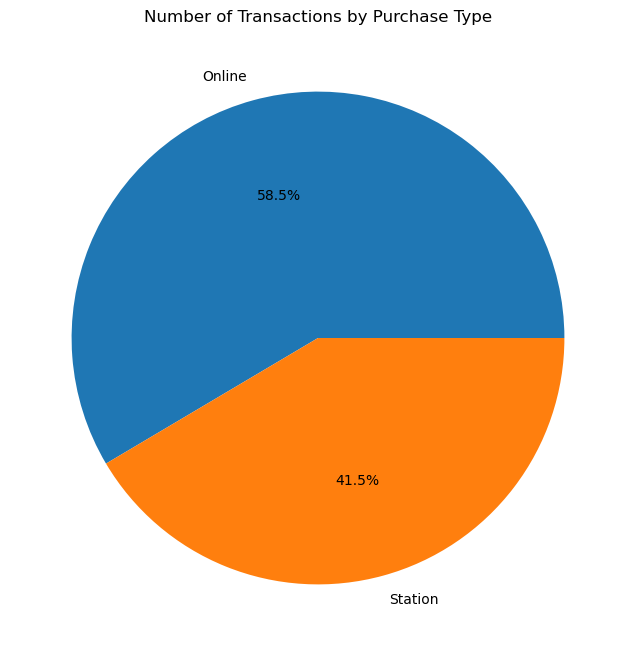

In [111]:
plt.figure(figsize=(10, 8))
plt.pie(purchase_type_counts, labels=purchase_type_counts.index, autopct='%1.1f%%')
plt.title('Number of Transactions by Purchase Type')
plt.show()

The chart titled "Number of Transactions by Purchase Type" is a pie chart that illustrates the distribution of transactions based on two purchase types: **Online** and **Station**. Here's a detailed description of the chart:

##### Key Observations:

1. **Purchase Types:**
   - The chart is divided into two segments, each representing a different purchase type:
     - **Online:** Represented by the blue segment.
     - **Station:** Represented by the orange segment.

2. **Percentage Distribution:**
   - **Online:** Accounts for **58.5%** of the total transactions. This is the dominant segment in the chart, occupying the majority of the pie.
   - **Station:** Accounts for **41.5%** of the total transactions. This segment represents the remaining portion of the pie.

##### Visual Breakdown:
- The blue segment (Online) occupies a significantly larger portion of the pie chart, indicating that online purchases are the primary method of conducting transactions.
- The orange segment (Station) represents a smaller but still substantial portion of the transactions.

##### Insights:
- **Dominance of Online Purchases:** Online transactions constitute the majority of all transactions, with 58.5%. This suggests that customers prefer digital channels for making purchases.
- **Significant Contribution of Station Purchases:** While station purchases account for less than half of the total transactions, they still represent a notable portion (41.5%). This indicates that physical stations remain an important channel for some users.

##### Implications:
- **Focus on Digital Channels:** The high percentage of online transactions highlights the importance of maintaining and enhancing online platforms to cater to customer preferences. Strategies to improve the user experience, security, and convenience of online transactions could further boost their dominance.
- **Continued Support for Station Purchases:** Despite being less dominant, station transactions still play a significant role. Ensuring that station-based services are efficient, user-friendly, and accessible can help retain customers who prefer in-person interactions.
- **Balanced Approach:** While online transactions lead, there may be opportunities to optimize both online and station-based processes to increase overall transaction efficiency and customer satisfaction.

##### Summary:
This pie chart clearly shows that **online purchases** dominate the number of transactions, accounting for 58.5%, while **station purchases** contribute the remaining 41.5%. The data underscores the growing preference for digital channels while also acknowledging the continued relevance of physical stations. Strategic decisions should focus on leveraging the strengths of both channels to maximize overall transaction volumes and customer engagement.

### <h3 style="color:#5DADE2;"><b>📊 16. Revenue Impact of Refund Requests by Journey Status</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

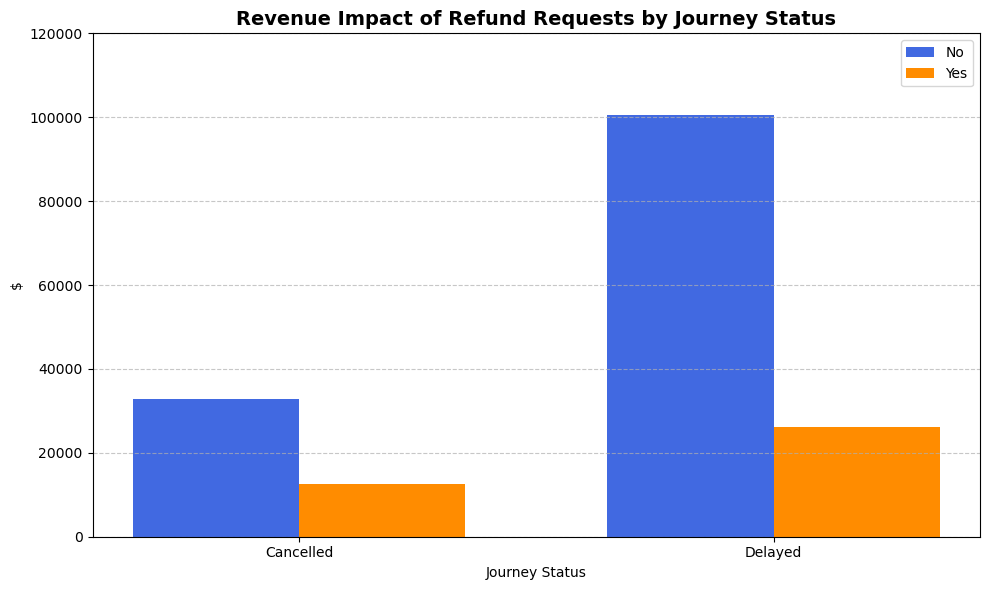

In [112]:
# Filter only Cancelled and Delayed statuses
filtered_df = fact_transactions[fact_transactions['Journey_Status'].isin(['Cancelled', 'Delayed'])]

# Group by Journey_Status and Refund Request, summing the Price
grouped = filtered_df.groupby(['Journey_Status', 'Refund_Request'])['Price'].sum().unstack(fill_value=0)

# Make sure 'Yes' and 'No' columns exist (in case one is missing)
if 'Yes' not in grouped.columns:
    grouped['Yes'] = 0
if 'No' not in grouped.columns:
    grouped['No'] = 0

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(grouped.index))

# Bars
ax.bar([i - bar_width/2 for i in index], grouped['No'], bar_width, label='No', color='royalblue')
ax.bar([i + bar_width/2 for i in index], grouped['Yes'], bar_width, label='Yes', color='darkorange')

# Chart formatting
ax.set_title('Revenue Impact of Refund Requests by Journey Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Journey Status')
ax.set_ylabel('$')
ax.set_xticks(index)
ax.set_xticklabels(grouped.index)
ax.set_ylim(0, 120000)
ax.legend(loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The chart titled "Revenue Impact of Refund Requests by Journey Status" is a grouped bar chart that illustrates the revenue impact of refund requests based on two journey statuses: **Cancelled** and **Delayed**. The chart uses two colors to represent whether a refund request was made or not:

- **Blue (No):** Indicates no refund request.
- **Orange (Yes):** Indicates a refund request.

##### Key Observations:

1. **Journey Statuses:**
   - The x-axis represents two journey statuses:
     - **Cancelled:** Refers to journeys that were cancelled.
     - **Delayed:** Refers to journeys that were delayed.

2. **Revenue Impact:**
   - The y-axis represents the revenue impact in monetary terms, ranging from 0 to approximately 100,000.

3. **Bar Heights:**
   - For **Cancelled Journeys:**
     - **No Refund Request (Blue):** Approximately 30,000.
     - **Refund Request (Orange):** Approximately 15,000.
   - For **Delayed Journeys:**
     - **No Refund Request (Blue):** Approximately 100,000.
     - **Refund Request (Orange):** Approximately 25,000.

##### Visual Breakdown:
- **Cancelled Journeys:**
  - The blue bar (No Refund Request) is taller than the orange bar (Refund Request), indicating that journeys with no refund requests have a higher revenue impact compared to those with refund requests.
  - The difference between the two bars suggests that refund requests for cancelled journeys result in a significant reduction in revenue.

- **Delayed Journeys:**
  - Similar to cancelled journeys, the blue bar (No Refund Request) is significantly taller than the orange bar (Refund Request).
  - The revenue impact for delayed journeys without refund requests is much higher (around 100,000) compared to those with refund requests (around 25,000).

##### Insights:
- **Impact of Refund Requests:**
  - Refund requests have a substantial negative impact on revenue for both cancelled and delayed journeys.
  - In both cases, journeys without refund requests generate significantly higher revenue compared to those with refund requests.

- **Revenue Disparity:**
  - For **cancelled journeys**, the revenue impact of journeys without refund requests is roughly twice that of journeys with refund requests.
  - For **delayed journeys**, the disparity is even more pronounced, with journeys without refund requests generating approximately four times the revenue of those with refund requests.

##### Implications:
- **Minimizing Refund Requests:** Reducing the number of refund requests could have a significant positive impact on revenue. This might involve improving service reliability, enhancing customer communication, or offering incentives to discourage refunds.
- **Focus on Delayed Journeys:** Since delayed journeys have a much higher revenue impact when no refund is requested, efforts to minimize delays or improve customer satisfaction during delays could be particularly beneficial.
- **Understanding Customer Behavior:** Analyzing why customers request refunds for cancelled or delayed journeys can help identify areas for improvement in service delivery or policy adjustments.

##### Summary:
This chart highlights the significant negative impact of refund requests on revenue, especially for delayed journeys. Journeys without refund requests consistently generate much higher revenue compared to those with refund requests. Strategic initiatives to reduce refund requests, particularly for delayed journeys, could lead to substantial improvements in overall revenue.

### <h3 style="color:#5DADE2;"><b>📊 17. Number of Refund Requests by Journey Status</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

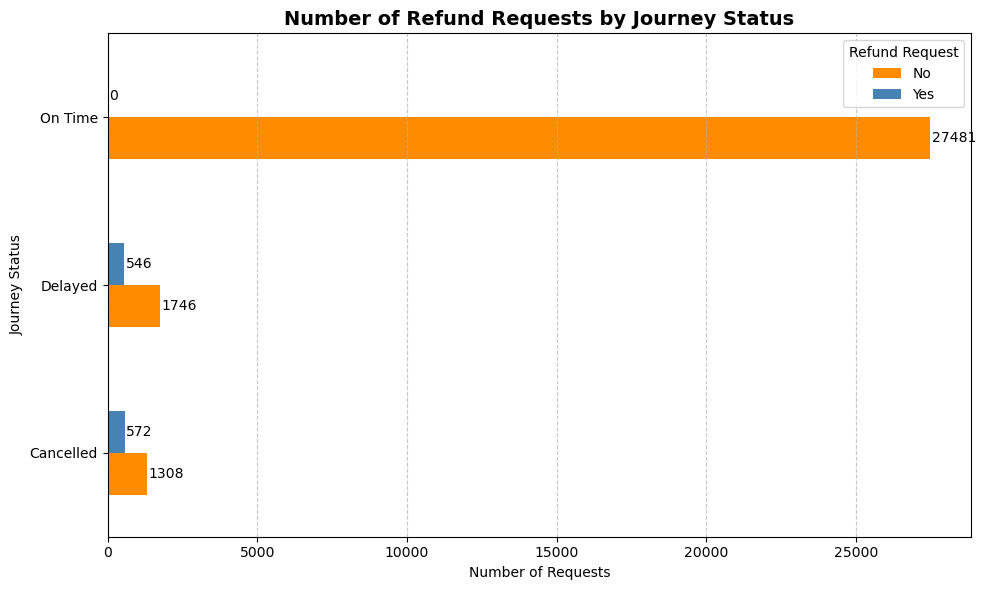

In [113]:
 # 1. Strip column names (if not done already)
fact_transactions.columns = fact_transactions.columns.str.strip()

# 2. Group and count
grouped = fact_transactions.groupby(['Journey_Status', 'Refund_Request']).size().unstack(fill_value=0)

# 3. Sort order if you want consistent bar arrangement
grouped = grouped.reindex(['Cancelled', 'Delayed', 'On Time'])

# 4. Plotting
ax = grouped.plot(kind='barh', figsize=(10, 6), color=['darkorange', 'steelblue'])

# 5. Adding value labels to bars
for i in ax.patches:
    ax.text(i.get_width() + 50, i.get_y() + i.get_height()/2, int(i.get_width()), va='center')

# 6. Customizing the chart
plt.title('Number of Refund Requests by Journey Status', fontsize=14, fontweight='bold')
plt.xlabel('Number of Requests')
plt.ylabel('Journey Status')
plt.legend(title='Refund Request')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The chart titled "Number of Refund Requests by Journey Status" is a horizontal bar chart that illustrates the number of refund requests based on three journey statuses: **On Time**, **Delayed**, and **Cancelled**. The chart uses two colors to represent whether a refund request was made or not:

- **Orange (No):** Indicates no refund request.
- **Blue (Yes):** Indicates a refund request.

##### Key Observations:

1. **Journey Statuses:**
   - The y-axis represents three categories of journey status:
     - **On Time:** Journeys that arrived on schedule.
     - **Delayed:** Journeys that were delayed.
     - **Cancelled:** Journeys that were cancelled.

2. **Refund Request Categories:**
   - The x-axis represents the number of refund requests, ranging from 0 to approximately 27,500.

3. **Bar Heights:**
   - For **On Time Journeys:**
     - **No Refund Request (Orange):** Approximately **27,481**.
     - **Refund Request (Blue):** No visible blue bar, indicating zero refund requests.
   - For **Delayed Journeys:**
     - **No Refund Request (Orange):** Approximately **1,746**.
     - **Refund Request (Blue):** Approximately **546**.
   - For **Cancelled Journeys:**
     - **No Refund Request (Orange):** Approximately **1,308**.
     - **Refund Request (Blue):** Approximately **572**.

##### Visual Breakdown:
- **On Time Journeys:**
  - The orange bar (No Refund Request) is extremely long, indicating that almost all on-time journeys did not result in refund requests.
  - There are no refund requests for on-time journeys, as indicated by the absence of a blue bar.

- **Delayed Journeys:**
  - The orange bar (No Refund Request) is shorter compared to the on-time category, showing that fewer delayed journeys had no refund requests.
  - The blue bar (Refund Request) is present but much shorter than the orange bar, indicating that some delayed journeys resulted in refund requests.

- **Cancelled Journeys:**
  - Similar to delayed journeys, the orange bar (No Refund Request) is shorter than the on-time category.
  - The blue bar (Refund Request) is also present, showing that a significant portion of cancelled journeys resulted in refund requests.

##### Insights:
- **Dominance of No Refund Requests for On-Time Journeys:** Almost all on-time journeys (27,481) did not have any refund requests, highlighting high customer satisfaction with timely arrivals.
- **Refund Requests for Delayed Journeys:** A small fraction of delayed journeys (546 out of 2,292 total requests) resulted in refund requests, indicating that delays negatively impact customer satisfaction but do not universally lead to refunds.
- **Refund Requests for Cancelled Journeys:** A notable number of cancelled journeys (572 out of 1,880 total requests) resulted in refund requests, suggesting that cancellations significantly affect customer satisfaction and often lead to refunds.

##### Implications:
- **Focus on On-Time Performance:** Maintaining on-time performance is crucial, as it ensures high customer satisfaction and minimizes refund requests.
- **Addressing Delays:** While delays do not always result in refunds, they still negatively impact customer experience. Improving punctuality could help reduce dissatisfaction and potential refunds.
- **Managing Cancellations:** Cancellations are a major driver of refund requests. Strategies to minimize cancellations or improve communication during cancellations could help mitigate their negative impact on revenue.

##### Summary:
This chart shows that **on-time journeys** overwhelmingly avoid refund requests, while **delayed** and **cancelled** journeys are more likely to result in refunds. The data underscores the importance of maintaining on-time performance and addressing issues related to delays and cancellations to reduce refund requests and enhance customer satisfaction.

### <h3 style="color:#5DADE2;"><b>🔘 18. Proportion of Refund Requests</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

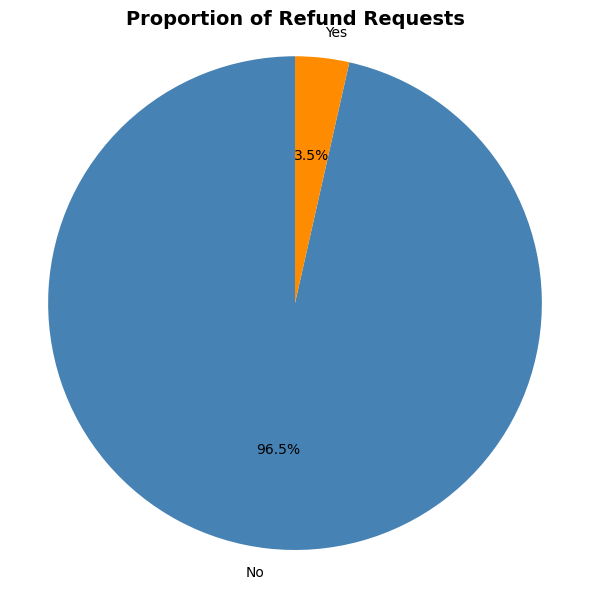

In [114]:
# Make sure column names are stripped of whitespace
fact_transactions.columns = fact_transactions.columns.str.strip()

# 1. Count the values in 'Refund Request' column
refund_proportion = fact_transactions['Refund_Request'].value_counts()

# 2. Pie chart
plt.figure(figsize=(6, 6))
plt.pie(refund_proportion, labels=refund_proportion.index, autopct='%1.1f%%', colors=['steelblue', 'darkorange'], startangle=90)
plt.title('Proportion of Refund Requests', fontsize=14, fontweight='bold')
plt.axis('equal')  # Ensures pie is circular
plt.tight_layout()
plt.show()

The chart titled "Proportion of Refund Requests" is a pie chart that illustrates the proportion of refund requests based on whether a refund was requested or not. Here's a detailed description of the chart:

##### Key Observations:

1. **Categories:**
   - The chart is divided into two segments, each representing a different category:
     - **No:** Refers to cases where no refund request was made.
     - **Yes:** Refers to cases where a refund request was made.

2. **Proportions:**
   - **No (Blue):** Accounts for **96.5%** of the total refund requests. This is the dominant segment in the chart, occupying the vast majority of the pie.
   - **Yes (Orange):** Accounts for **3.5%** of the total refund requests. This segment represents a very small portion of the pie.

##### Visual Breakdown:
- The blue segment (No) occupies the overwhelming majority of the pie chart, indicating that the vast majority of cases did not involve a refund request.
- The orange segment (Yes) represents a tiny fraction of the pie, highlighting that only a small percentage of cases resulted in refund requests.

##### Insights:
- **Dominance of No Refund Requests:** The overwhelming majority (96.5%) of cases involved no refund requests, suggesting high customer satisfaction or low dissatisfaction with the service/product.
- **Low Proportion of Refund Requests:** Only 3.5% of cases involved refund requests, indicating that refunds are relatively rare and that most customers are content with their purchases or experiences.

##### Implications:
- **Positive Customer Satisfaction:** The high proportion of cases without refund requests suggests that the service or product being analyzed is generally well-received by customers, leading to minimal dissatisfaction.
- **Efficient Operations/Service Delivery:** The low rate of refund requests could indicate efficient operations, clear communication, or effective handling of issues, reducing the need for refunds.
- **Potential Areas for Improvement:** While the majority of customers are satisfied, the 3.5% who requested refunds may represent areas for improvement. Analyzing these cases could help identify specific pain points or issues that lead to dissatisfaction.

##### Summary:
This pie chart clearly shows that **no refund requests** dominate the distribution, accounting for 96.5%, while **refund requests** make up only 3.5%. The data highlights strong customer satisfaction overall, with very few instances of dissatisfaction leading to refunds. Strategic efforts should focus on maintaining this high level of satisfaction while addressing the underlying reasons for the small percentage of refund requests to further enhance customer experience.

### <h3 style="color:#5DADE2;"><b>📊 19. Delay Reasons</b></h3>

<span style="color:#AAB7B8;"><i>Chart illustrates the fluctuations in revenue over the period from January to May.</i></span>

---

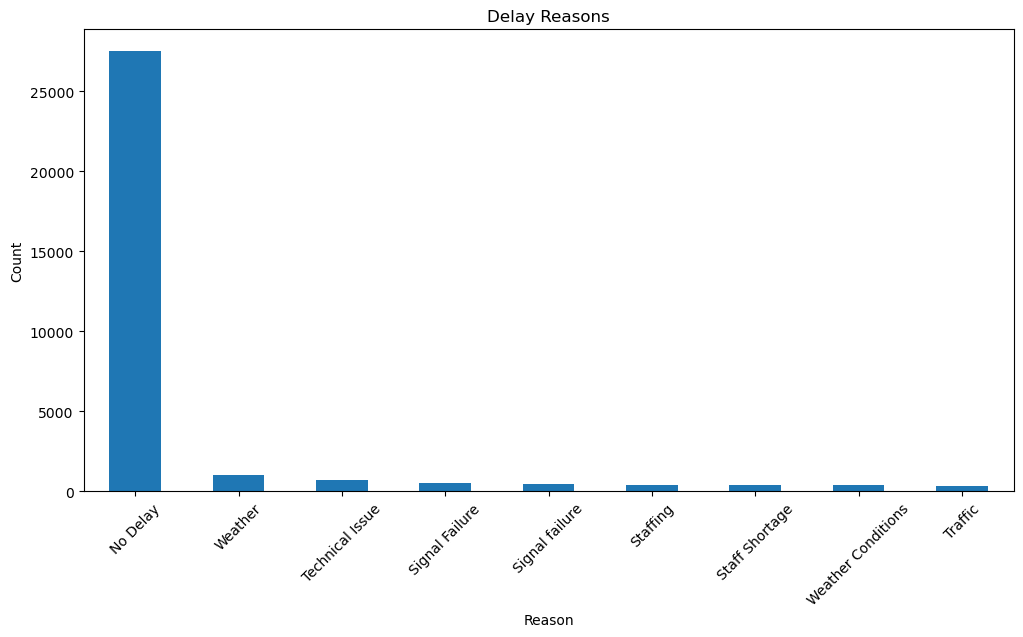

In [115]:
delay_reasons = df['Reason for Delay'].value_counts()
plt.figure(figsize=(12, 6))
delay_reasons.plot(kind='bar')
plt.title('Delay Reasons')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [3]:
def main():
    x = 1
    y = 3.4
    print(x, y)
    change_us(x, y)
    print(x, y)

def change_us(a,b):
    a = 0
    b = 0
    print(a,b)

main()

1 3.4
0 0
1 3.4


### Extract the data for the dashboard

The chart titled "Delay Reasons" is a bar chart that illustrates the count of occurrences for various reasons contributing to delays. Here's a detailed description of the chart:

##### Key Observations:

1. **Reasons for Delays:**
   - The x-axis lists different delay reasons:
     - **No Delay:** Refers to instances where there was no delay.
     - **Weather:** Refers to delays caused by weather conditions.
     - **Technical Issue:** Refers to delays due to technical problems.
     - **Signal Failure:** Refers to delays caused by signal failures.
     - **Staffing:** Refers to delays due to staffing issues.
     - **Staff Shortage:** Refers to delays caused by insufficient staff.
     - **Weather Conditions:** Refers to delays due to adverse weather conditions.
     - **Traffic:** Refers to delays caused by traffic congestion.

2. **Count of Occurrences:**
   - The y-axis represents the count of occurrences, ranging from 0 to approximately 27,000.

3. **Bar Heights:**
   - **No Delay:** This category has the highest count, exceeding **27,000**, indicating that most instances did not experience any delays.
   - **Weather:** Has a moderate count, around **1,000**.
   - **Technical Issue:** Has a relatively low count, approximately **500**.
   - **Signal Failure:** Has a very low count, close to **200**.
   - **Staffing:** Has an extremely low count, nearly negligible.
   - **Staff Shortage:** Has a very low count, close to **100**.
   - **Weather Conditions:** Has a very low count, close to **100**.
   - **Traffic:** Has a very low count, close to **100**.

##### Visual Breakdown:
- The blue bars represent the count of occurrences for each delay reason.
- The **No Delay** category stands out as the tallest bar, significantly surpassing all other categories.
- The remaining categories (Weather, Technical Issue, Signal Failure, Staffing, Staff Shortage, Weather Conditions, and Traffic) have much shorter bars, indicating that they contribute minimally to overall delays.

##### Insights:
- **Dominance of No Delays:** The vast majority of instances had no delays, suggesting that the system or service being analyzed operates smoothly most of the time.
- **Moderate Impact of Weather:** Weather-related delays are the second-most significant factor, but their impact is still considerably lower compared to no delays.
- **Negligible Impact of Other Factors:** Technical issues, signal failures, staffing, staff shortages, weather conditions, and traffic collectively account for only a small fraction of the total occurrences, indicating that these factors rarely cause delays.

##### Implications:
- **Focus on Maintaining Smooth Operations:** Since most instances do not experience delays, efforts should continue to ensure consistent performance and reliability.
- **Addressing Weather-Related Delays:** While weather-related delays are minimal compared to no delays, they still represent the most significant external factor causing disruptions. Strategies to mitigate the impact of weather conditions (e.g., improved forecasting, contingency plans) could help reduce these delays further.
- **Monitoring Rare Issues:** Although technical issues, signal failures, and staffing-related delays are rare, it is important to monitor and address them proactively to prevent potential escalation or recurrence.

##### Summary:
This bar chart shows that **no delays** dominate the data, accounting for over 27,000 occurrences, while other delay reasons such as weather, technical issues, and signal failures contribute minimally. The data highlights the overall reliability of the system but suggests areas for improvement in managing weather-related disruptions.

## <p style="color: #76D7C4;">VIII. Conclusion</p>

This analysis of UK train ridership data provides a detailed understanding of customer behavior, revenue distribution, and operational performance. Key findings reveal that advance tickets dominate revenue generation, online purchases significantly outpace station-based transactions, and standard-class tickets account for the majority of sales. On-time journeys are the norm, with delays and cancellations being relatively infrequent, though they disproportionately impact refund requests and customer satisfaction. Additionally, weather-related issues emerge as the leading cause of delays, while staffing and technical problems play a minor but notable role.

The preference for credit card payments, low utilization of railcards, and varying contributions from different departure stations further highlight opportunities to refine service delivery and marketing strategies. Together, these insights underscore the importance of maintaining reliability, enhancing digital platforms, and addressing specific pain points to improve overall customer experience and maximize revenue.

### Recommendations

1. **Promote Advance Ticket Sales:**  
   Since advance tickets generate the highest revenue, targeted campaigns highlighting discounts or benefits for early bookings could encourage more customers to purchase in advance. This would not only boost revenue but also improve demand forecasting and resource allocation.

2. **Enhance Online Booking Platforms:**  
   Given the dominance of online transactions, investing in user-friendly digital interfaces and secure payment systems will cater to customer preferences and drive further adoption of online purchases. Consider introducing incentives such as exclusive online discounts to further promote this channel.

3. **Improve Delay Management:**  
   While delays are infrequent, their impact on customer satisfaction and refund requests is significant. Strengthening contingency plans for adverse weather conditions and improving communication during disruptions can help mitigate dissatisfaction. Investing in predictive technologies to anticipate and address potential delays could also enhance reliability.

4. **Encourage Railcard Usage:**  
   The low utilization of railcards suggests an opportunity to market their benefits more effectively. Offering limited-time promotions or bundled deals for railcard holders could increase adoption rates, particularly among senior and disabled passengers who may benefit most from discounted fares.

5. **Focus on Key Departure Stations:**  
   High-revenue stations like London Kings Cross should be prioritized for service enhancements and capacity expansions. Regional hubs such as Manchester Piccadilly could also benefit from targeted investments to balance regional and national travel demands.

6. **Minimize Refund Requests:**  
   Addressing the root causes of cancellations and delays—such as technical issues or staff shortages—can reduce refund requests. Additionally, offering flexible rebooking options instead of full refunds could improve customer retention while minimizing financial losses.

7. **Leverage First-Class Services:**  
   Although first-class tickets contribute less revenue proportionally, they likely offer higher profit margins. Promoting premium services through loyalty programs or bundled packages could attract more customers willing to pay for added comfort and convenience.

8. **Monitor Rare but Critical Issues:**  
   Though factors like signal failures and staffing shortages occur infrequently, they can have cascading effects on operations. Implementing proactive monitoring systems and regular maintenance schedules will ensure these issues remain rare and manageable.

By implementing these recommendations, stakeholders can build a more resilient, customer-centric rail network that meets the evolving needs of UK train riders while driving sustainable growth and operational excellence.